# Road Traffic Severity Classification Prediction

## 00_Step Importing required Libraries
* Define problem (regression, classification etc.) with objective, success criteria, and constraints.
* Import required libraries.

### About Data
This dataset is collected from Addis Ababa Sub-city police departments for 
master's research work. The data set has been prepared from manual records of 
road traffic accidents of the year 2017-20. All the sensitive information has been 
excluded during data encoding and finally it has 32 features and 12316 instances 
of the accident. Then it is preprocessed and for identification of major causes of 
the accident by analyzing it using different machine learning classification 
algorihms. ithms. 

### Problem Statement
The target feature is Accident_severity which is a multi-class variable. The 
task is to classify this variable based on the other 31 features step-by-step by 
going through each day's task. Your metric for evaluation will be f1-screthms. 

### Importing the required librariesFollowint librairies are used to complete this project.. 

In [1]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
from phik.report import plot_correlation_matrix
from skimpy import skim
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# feature engineering libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , LabelEncoder, OrdinalEncoder , OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest, chi2 , SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# model preparation libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.svm import SVC , NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier , XGBRFClassifier

# model evaluation libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedKFold

# model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## 01. Data Wrangling

- Data Gathering
- Data Accessing
- Data Cleaning

#### Data Gethering

### Data Accessing

In this step, the data is to be understood more deeply. Before implementing methods to clean it, you will definitely need to have a better idea about what the data is about.

In [2]:
# Reset display options (optional)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [3]:
dataset = pd.read_csv("RTA Dataset.csv")
dataset.head(2)

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   

  Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0             na              na                   na                na   
1             na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   

  Cause_of_accident Accident_severity  
0   Moving Backward     Slight Injury  
1        Overtaking     Slight Injury  

[2 rows x 32 columns]

In [4]:
# Removing white spaces and converting Time in hours and time formate
dateset = dataset.map(lambda x: x.strip() if isinstance(x, str) else x)
# dataset["Time"] = pd.to_timedelta(dataset["Time"])
dataset["Hour_of_day"] = pd.to_timedelta(dataset["Time"]).dt.components['hours']

In [5]:
skim(dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 12316  │ │ string      │ 30    │                                                          │
│ │ Number of columns │ 33     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0  ┃ p25   ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Number_of_vehicles_involve │    0 │      0 │      2 │   0.69 │   1 │     2 │    2 │    2 │     7 │   ▂▇▂   │  │
│ │ d                          │      │        │        │        │     │       │      │      │       │         │  │
│ │ Number_of_casualties       │    0 │      0 │    1.5 │      1 │   1 │     1 │    1 │    2 │     8 │   ▇▁    │  │
│ │ Hour_of_day                │    0 │      0 │     14 │    5.2 │   0 │    10 │   15 │   18 │    23 │ ▁▂▅▆▇▃  │  │
│ └────────────────────────────┴──────┴────────┴────────┴────────┴─────┴───────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Time                                │        0 │          0 │                       1 │              12316 │  │
│ │ Day_of_week                         │        0 │          0 │                       1 │              12316 │  │
│ │ Age_band_of_driver                  │        0 │          0 │                     1.2 │              14726 │  │
│ │ Sex_of_driver                       │        0 │          0 │                       1 │              12316 │  │
│ │ Educational_level                   │      741 │       6.02 │                     2.5 │              31162 │  │
│ │ Vehicle_driver_relation             │      579 │        4.7 │                    0.95 │              11737 │  │
│ │ Driving_experience                  │      829 │       6.73 │                     1.2 │              15209 │  │
│ │ Type_of_vehicle                     │      950 │       7.71 │                     1.7 │              20767 │  │
│ │ Owner_of_vehicle                    │      482 │       3.91 │                    0.96 │              11834 │  │
│ │ Service_year_of_vehicle             │     3928 │      31.89 │                    0.81 │               9994 │  │
│ │ Defect_of_vehicle                   │     4427 │      35.95 │                     1.3 │              15666 │  │
│ │ Area_accident_occured               │      239 │       1.94 │                     1.9 │              23250 │  │
│ │ Lanes_or_Medians                    │      385 │       3.13 │                       4 │              49726 │  │
│ │ Road_allignment                     │      142 │    

#### Handling Features with missing Values

In [6]:
round((dataset.isnull().sum().sum()) / (dataset.shape[0] * dataset.shape[1]) *100,2).astype(str) + " %"

'4.93 %'

##### 💡 Observation 
* If there are more tahn 50% null values in dataset it doesn,t qaulify for good anlysis and model. 

In [7]:
# Check for missing values
missing_value_percent = round(dataset.isnull().sum() / dataset.shape[0] * 100,2)
(missing_value_percent[missing_value_percent > 0 ]).astype(str) + " %"

Educational_level           6.02 %
Vehicle_driver_relation      4.7 %
Driving_experience          6.73 %
Type_of_vehicle             7.71 %
Owner_of_vehicle            3.91 %
Service_year_of_vehicle    31.89 %
Defect_of_vehicle          35.95 %
Area_accident_occured       1.94 %
Lanes_or_Medians            3.13 %
Road_allignment             1.15 %
Types_of_Junction            7.2 %
Road_surface_type            1.4 %
Type_of_collision           1.26 %
Vehicle_movement             2.5 %
Work_of_casuality          25.97 %
Fitness_of_casuality       21.39 %
dtype: object

##### 💡 Observation 
* If there are more than 20% null/na/Nan values in a feature it doesn,t qaulify for good anlysis and model unless it is required by domain after carefull analysis. 

In [8]:
missing_value_column = missing_value_percent[missing_value_percent > 20].index
missing_value_column

Index(['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality',
       'Fitness_of_casuality'],
      dtype='object')

In [9]:
# Drop features with missing values > 20%
dataset.drop(columns=missing_value_column ,inplace=True)

In [10]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'object']
num_features=[col for col in dataset.columns if pd.api.types.is_numeric_dtype(dataset[col])]
discrete_features =[feature for feature in num_features if len(dataset[feature].unique()) < 20]
continous_features = [feature for feature in num_features if feature not in discrete_features]
print(f"Categorical features count: {len(categorical_features)}")
print(f"Numerical features count: {len(num_features)}")
print(f"Discrete features count: {len(discrete_features)}")
print(f"Contineous features count: {len(continous_features)}")

Categorical features count: 26
Numerical features count: 3
Discrete features count: 2
Contineous features count: 1


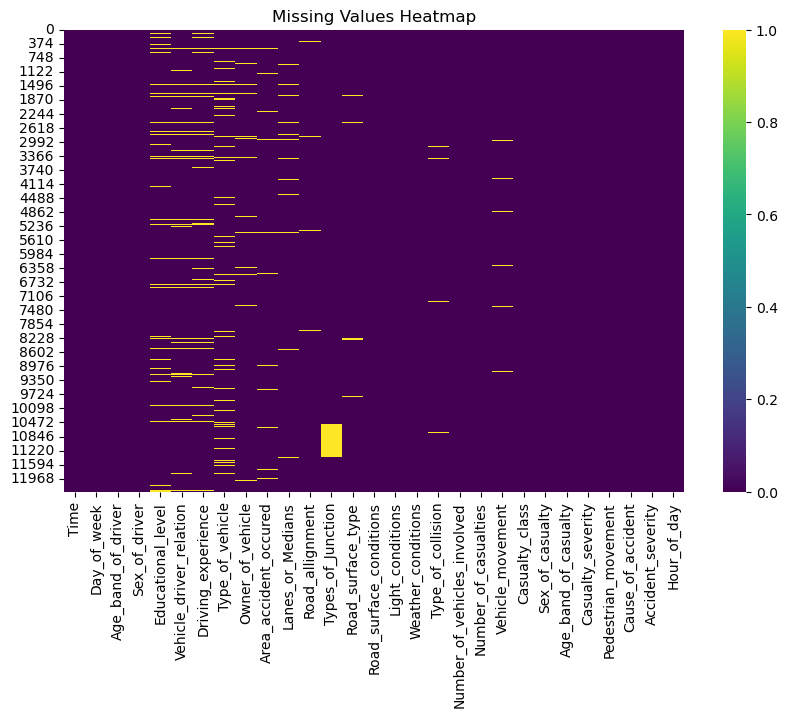

In [11]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap')
plt.show()

In [12]:
missing_rows = dataset.isnull().sum()
missing_rows[missing_rows>0]

Educational_level          741
Vehicle_driver_relation    579
Driving_experience         829
Type_of_vehicle            950
Owner_of_vehicle           482
Area_accident_occured      239
Lanes_or_Medians           385
Road_allignment            142
Types_of_Junction          887
Road_surface_type          172
Type_of_collision          155
Vehicle_movement           308
dtype: int64

In [13]:
dataset["Age_band_of_driver"].value_counts().get('Unknown', 0)

1548

In [14]:
# Handling missing, na, and NaN values with mode value
def handle_missing_values_with_mode(df, columns):
    """
    Imputes missing values ("na" and NaN) in specified columns of a pandas DataFrame
    with the mode, addressing potential data type issues and providing informative messages.

    Args:
        df (pd.DataFrame): The pandas DataFrame containing the data.
        columns (list): A list of column names to handle missing values in.

    Returns:
        pd.DataFrame: The DataFrame with missing values replaced with the mode or appropriate messages.

    Raises:
        ValueError: If a column is not found or the data type is not compatible with the mode calculation.
    """
    for col in columns:
        try:
            # Check for string data type
            if pd.api.types.is_string_dtype(df[col]):
                # Count occurrences of each unique value
                value_counts = df[col].value_counts()
                # Get the most frequent value (mode)
                mode_value = value_counts.idxmax()
                # Replace "na" and "NaN" with the mode
                df[col] = df[col].replace(["na", np.nan], mode_value)
            else:
                mode_value = df[col].mode()[0]

            df[col].fillna(mode_value, inplace=True)

        except KeyError:
            print(f"Column '{col}' not found in the DataFrame.")
        except ValueError as e:
            print(f"Error handling missing values in column '{col}': {e}")
    return df


In [15]:
def replace_multiple_values(data, replacements):
  """Replaces multiple values with specified replacements in a DataFrame or Series.

  Args:
    data: The DataFrame or Series to replace values in.
    replacements: A dictionary where keys are values to replace and values are their replacements.

  Returns:
    The DataFrame or Series with values replaced.
  """

  if isinstance(data, pd.Series):
    return data.replace(replacements, inplace=False)  # Avoid modifying original Series
  else:
    def replace_values_in_column(column):
      return column.replace(replacements, inplace=False)  # Avoid modifying original DataFrame

    return data.apply(replace_values_in_column)

In [16]:
# missing_value_columns = missing_value_percent[missing_value_percent < 10].index
# df = handle_missing_values_with_mode(dataset.copy(), missing_value_columns)

In [17]:
# Replacing null valaues with "Unknown"
def replace_null(value):
  return 'Unknown' if pd.isna(value) else value
df = dataset.applymap(replace_null)

In [18]:
# Replacing 'na' Values with 'Unknown' as well.
df = replace_multiple_values(df, replacements={'na':'Unknown', 'unknown':'Unknown'})

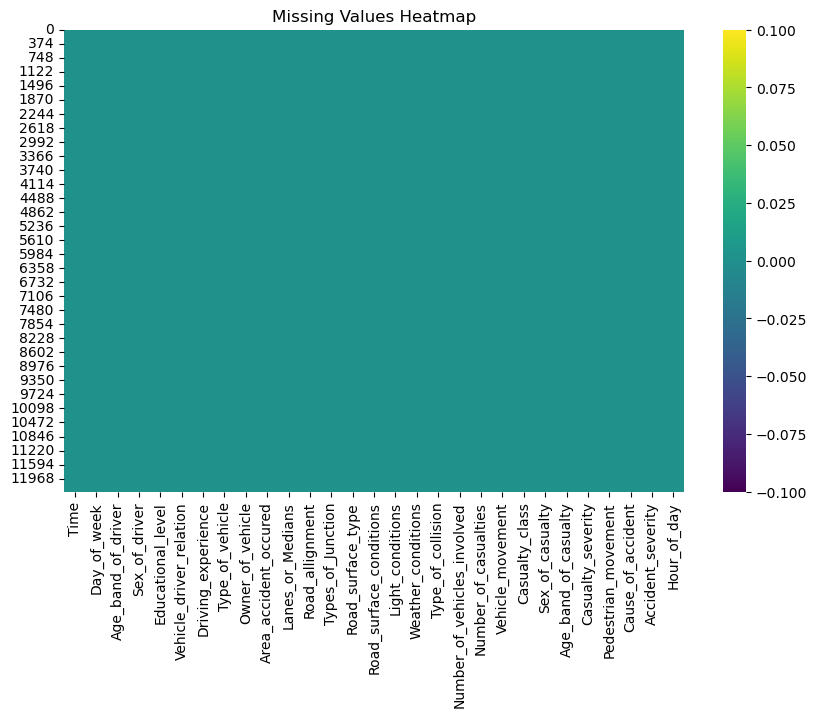

In [19]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap')
plt.show()

In [20]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(12316, 29)
(12316, 29)


In [21]:
missing_rows = df.isnull().sum()
missing_rows[missing_rows>0]

Series([], dtype: int64)

In [22]:
# Drop Duplicate rows
print(df.shape)
df.drop_duplicates()
print(df.shape)

(12316, 29)
(12316, 29)


In [23]:
def plot_numerical_distribution(feature, hue ="Accident_severity", data=df ,ticks_rotation = 0 , figsize=(5,3)):
    """
    Creates a visualization and calculates descriptive statistics for a numerical feature,
    colored by a categorical variable (hue).
    
    Args:
    feature (str): Name of the numerical feature to plot.
    hue (str): Name of the categorical variable for coloring.
    data (pd.DataFrame): DataFrame containing the data.
    """  
    # Descriptive statistics
    descriptive_stats = data.groupby(hue)[feature].describe(percentiles=[0.25, 0.5, 0.75])
    print(f"Descriptive Statistics for {feature} by {hue}:\n{descriptive_stats}")
    
    # Create histogram with hue
    plt.subplots(figsize=figsize)
    sns.histplot(data=data, x=feature, hue=hue, kde=True)
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.title(f"Distribution of {feature} by {hue}")
    plt.xticks(rotation = ticks_rotation)
    plt.show()

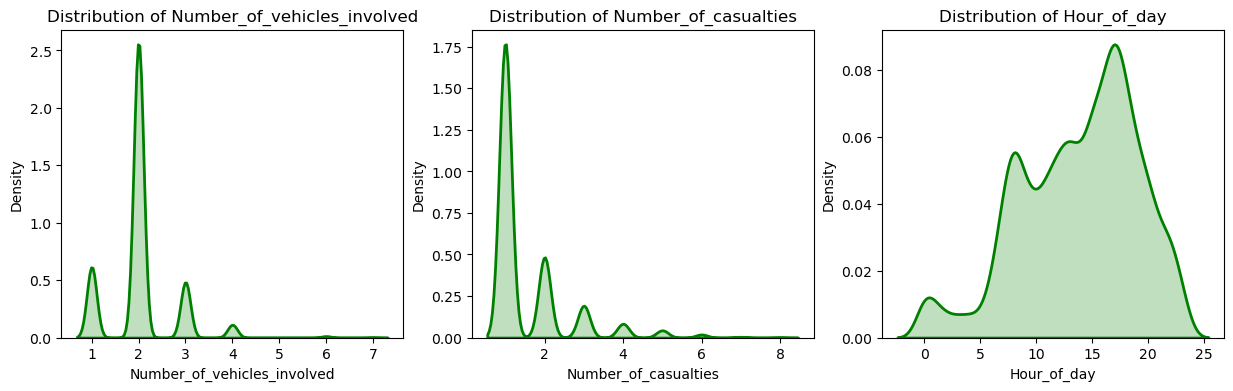

In [24]:
num_features = list(df.select_dtypes(include=['int64','float64']).columns)
num_features
# Set the figure size
plt.figure(figsize=(15, 4))  # Adjust as needed
# Calculate the number of rows and columns for the subplots
num_rows = (len(num_features) + 2) // 3  # Adjust the number of columns as needed
num_cols = 3
# Create subplots with KDE plots
for i, num in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    # sns.kdeplot(df_original[num], fill=True, color='skyblue', linewidth=2)
    sns.kdeplot(df[num], fill=True, color='green', linewidth=2)
    plt.title(f'Distribution of {num}')
    plt.xlabel(num)
    plt.ylabel('Density')

# plt.tight_layout()
plt.show()

Descriptive Statistics for Time by Accident_severity:
                   count unique       top freq
Accident_severity                             
Fatal injury         158     63  21:15:00   12
Serious Injury      1743    496  22:05:00   19
Slight Injury      10415   1009  15:30:00  106


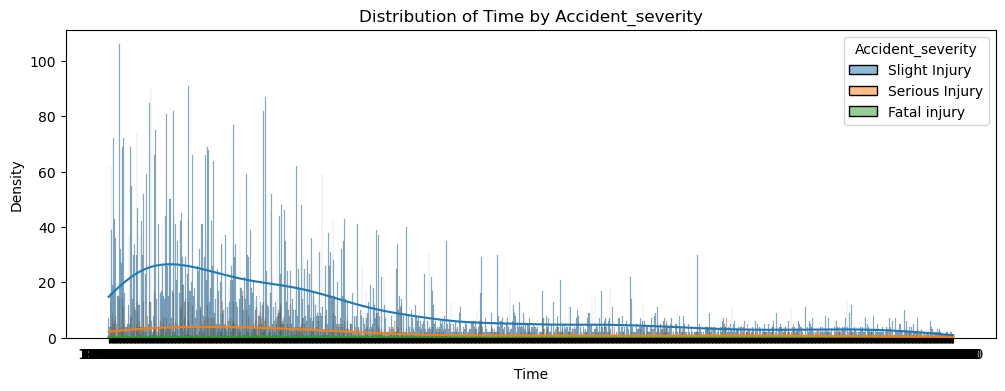

In [25]:
plot_numerical_distribution(feature="Time" , ticks_rotation=0 , figsize=(12,4))

Descriptive Statistics for Hour_of_day by Accident_severity:
                     count       mean       std  min   25%   50%   75%   max
Accident_severity                                                           
Fatal injury         158.0  14.797468  6.137241  0.0  11.0  16.0  20.0  23.0
Serious Injury      1743.0  13.931153  5.494164  0.0  10.0  15.0  18.0  23.0
Slight Injury      10415.0  13.805281  5.135976  0.0  10.0  15.0  18.0  23.0


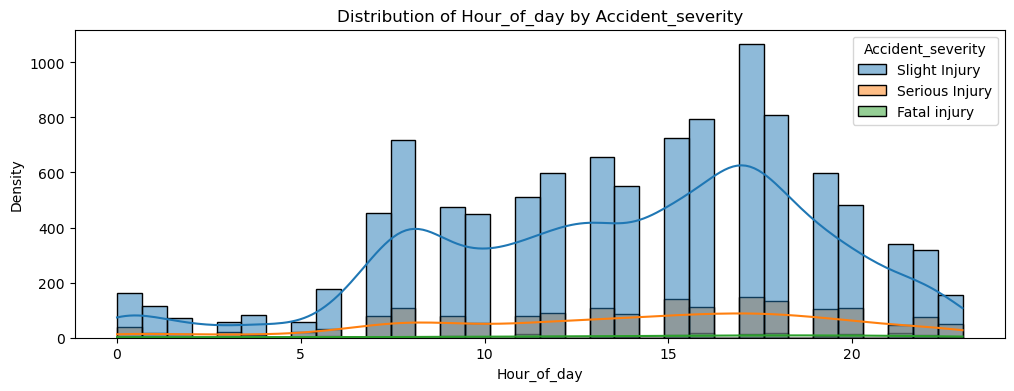

In [26]:
plot_numerical_distribution(feature="Hour_of_day" , ticks_rotation=0 , figsize=(12,4))

Descriptive Statistics for Number_of_vehicles_involved by Accident_severity:
                     count      mean       std  min  25%  50%  75%  max
Accident_severity                                                      
Fatal injury         158.0  1.797468  0.550153  1.0  1.0  2.0  2.0  3.0
Serious Injury      1743.0  1.895009  0.779247  1.0  1.0  2.0  2.0  6.0
Slight Injury      10415.0  2.068747  0.670568  1.0  2.0  2.0  2.0  7.0


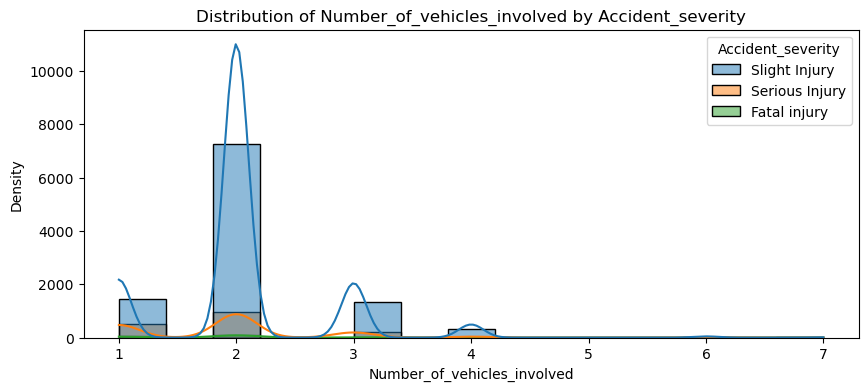

In [27]:
plot_numerical_distribution(feature="Number_of_vehicles_involved" , ticks_rotation=0 , figsize=(10,4))

Descriptive Statistics for Number_of_casualties by Accident_severity:
                     count      mean       std  min  25%  50%  75%  max
Accident_severity                                                      
Fatal injury         158.0  2.341772  1.372023  1.0  1.0  2.0  4.0  5.0
Serious Injury      1743.0  1.535284  1.034863  1.0  1.0  1.0  2.0  6.0
Slight Injury      10415.0  1.538262  0.991151  1.0  1.0  1.0  2.0  8.0


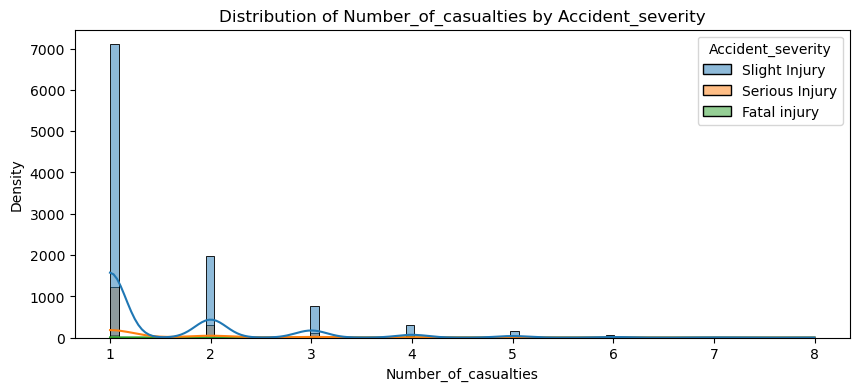

In [28]:
plot_numerical_distribution(feature="Number_of_casualties" , ticks_rotation=0 , figsize=(10,4))

In [29]:
def plot_category_distribution(feature, hue = "Accident_severity", data=df, ticks_rotation = 0, figsize=(8,5)):
    """
    Creates a custom bar plot using matplotlib to visualize the distribution of categories
    in a feature, colored by a target variable (hue), with categories on the y-axis.

    Args:
      feature (str): Name of the feature to plot.
      hue (str): Name of the target variable for coloring.
      data (pd.DataFrame): DataFrame containing the data.
    """
    # Get the number of occurrences for each category
    n_category = dataset[feature].value_counts()

    # Create a colormap (adjust the colormap name as desired)
    import matplotlib.cm as cm
    cmap = cm.tab10  # Choose a colormap from matplotlib.cm

    # Create the bar chart
    fig, ax = plt.subplots(figsize=figsize)
    plt.barh(n_category.index, n_category.values, color=cmap(range(len(n_category))))  
    plt.xlabel("Number of occurrences")
    plt.ylabel("Category")
    plt.title(f"Distribution of category [ {feature} ]")
    plt.xticks(rotation = ticks_rotation)
    plt.gca().invert_yaxis()  # Invert y-axis for horizontal display
    plt.show()

def plot_category_counts(feature, hue = "Accident_severity", data=df, ticks_rotation = 0 , figsize=(5,3), counts = False):
    """
    Creates a count plot using seaborn to visualize the distribution of categories in a feature,
    colored by a target variable (hue).

    Args:
      feature (str): Name of the feature to plot.
      hue (str): Name of the target variable for coloring.
      data (pd.DataFrame): DataFrame containing the data.
    """
    if counts == True:
        display(data[feature].value_counts())
    else:
        print("Note: Please pass count paramaeter as 'counts = True' if you want count deatil.")
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(x=feature, hue=hue, data=data)
    plt.xlabel(feature)
    plt.xticks(rotation = ticks_rotation)  
    plt.ylabel("Count")
    plt.title(f"Counts of Categories in [ {feature} ] by {hue}")
    plt.show()

In [30]:
print(categorical_features)
# df.columns

['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


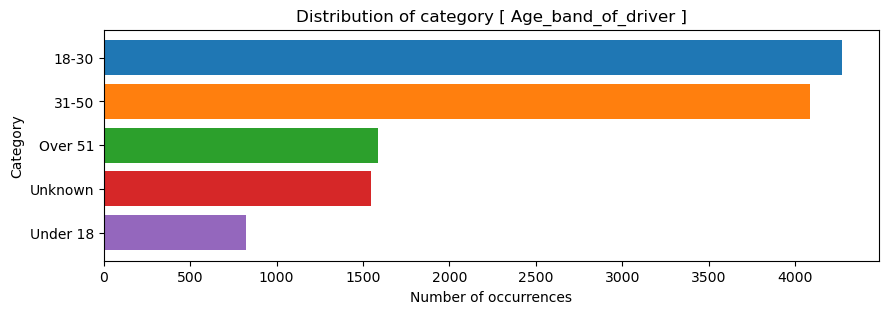

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


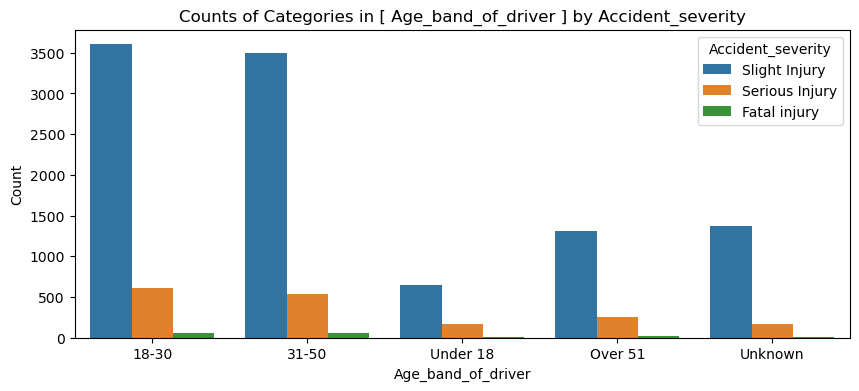

In [31]:
# df["Age_band_of_driver"] = df["Age_band_of_driver"].replace("Unknown", "18-30")
plot_category_distribution(feature="Age_band_of_driver" , figsize=(10,3))
plot_category_counts(feature="Age_band_of_driver", ticks_rotation=0 , figsize=(10,4))

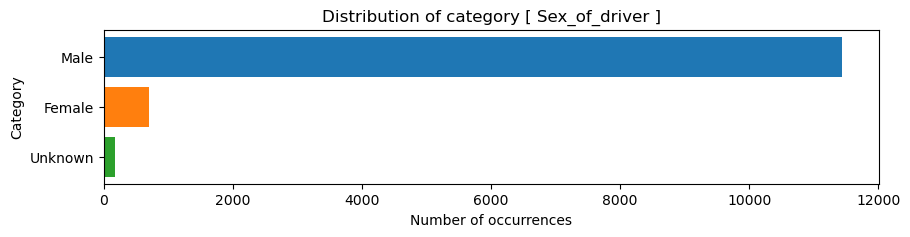

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64

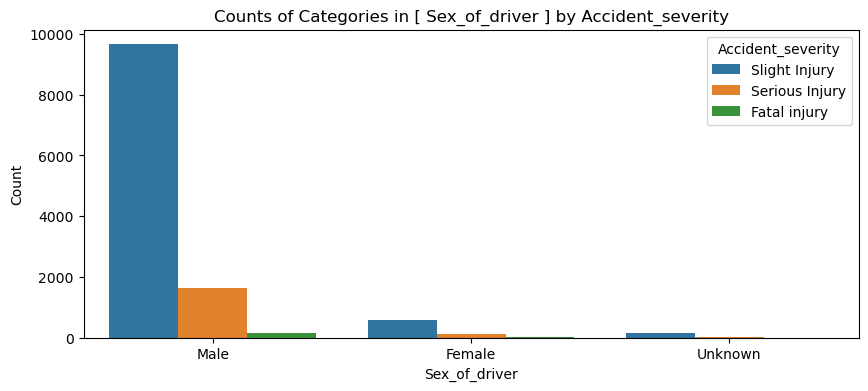

In [32]:
# df["Sex_of_driver"] = df["Sex_of_driver"].replace("Unknown", "Male")
plot_category_distribution(feature="Sex_of_driver" , figsize=(10,2))
plot_category_counts(feature="Sex_of_driver", ticks_rotation=0 , figsize=(10,4), counts=True)

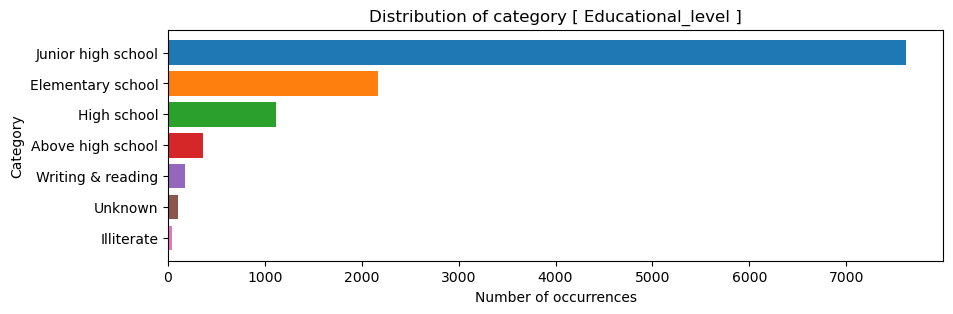

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


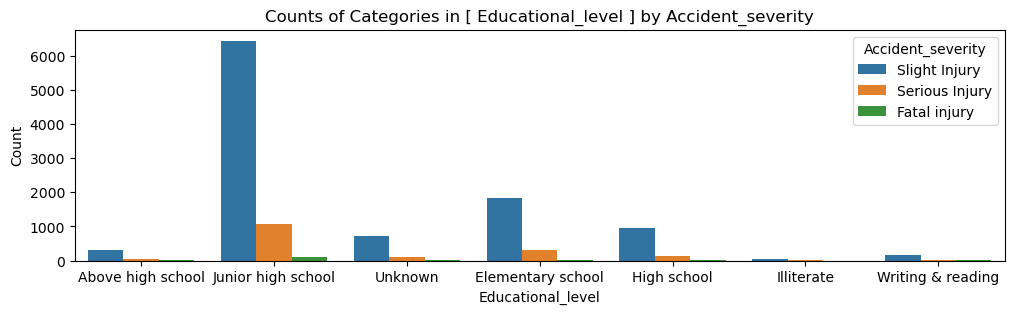

In [33]:
plot_category_distribution(feature="Educational_level" , figsize=(10,3))
plot_category_counts(feature="Educational_level", ticks_rotation=0 , figsize=(12,3), counts=False)

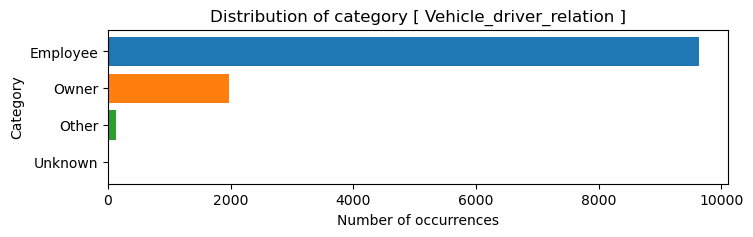

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


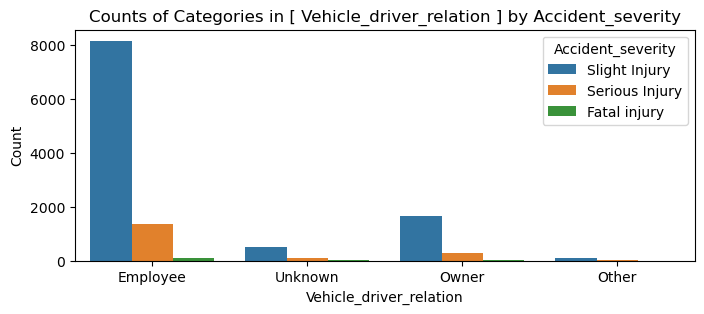

In [34]:
plot_category_distribution(feature="Vehicle_driver_relation" , figsize=(8,2))
plot_category_counts(feature="Vehicle_driver_relation", ticks_rotation=0 , figsize=(8,3), counts=False)

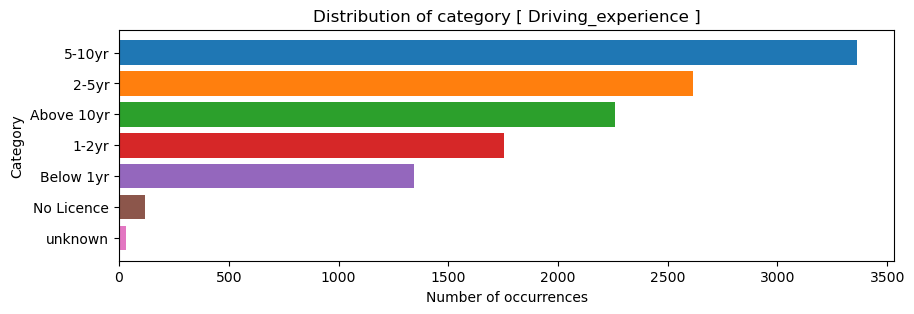

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


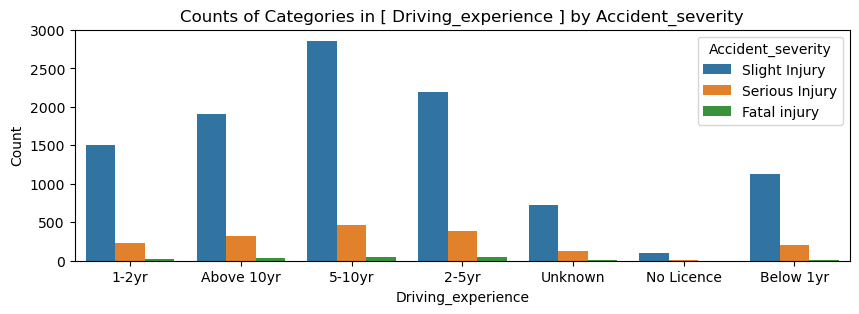

In [35]:
plot_category_distribution(feature="Driving_experience" , figsize=(10,3))
plot_category_counts(feature="Driving_experience", ticks_rotation=0 , figsize=(10,3), counts=False)

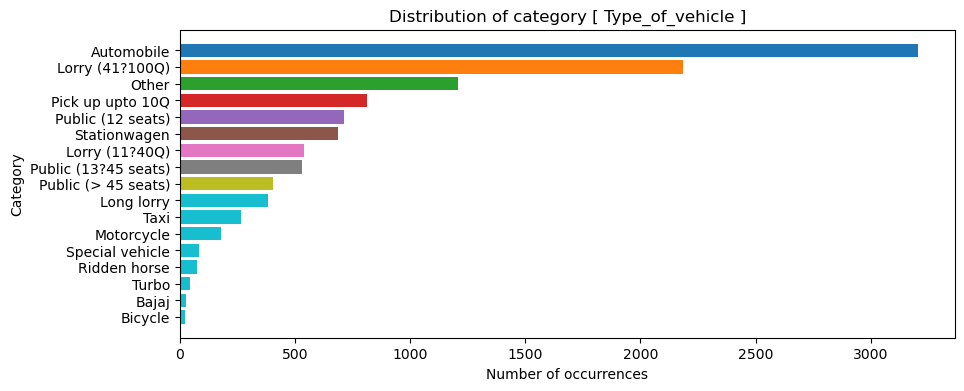

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


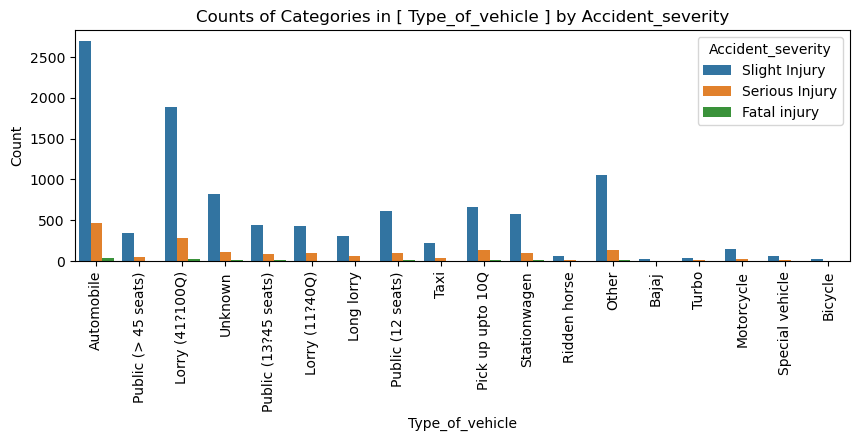

In [36]:
plot_category_distribution(feature="Type_of_vehicle" , figsize=(10,4))
plot_category_counts(feature="Type_of_vehicle", ticks_rotation=90 , figsize=(10,3))

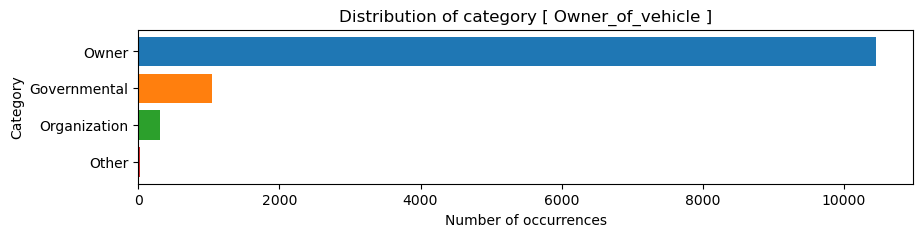

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


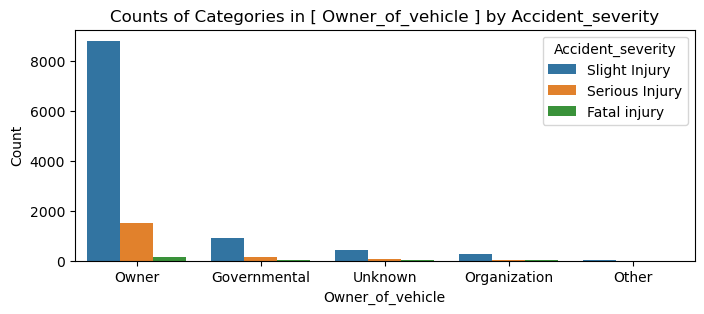

In [37]:
plot_category_distribution(feature="Owner_of_vehicle" , figsize=(10,2))
plot_category_counts(feature="Owner_of_vehicle", ticks_rotation=0 , figsize=(8,3),counts=False)

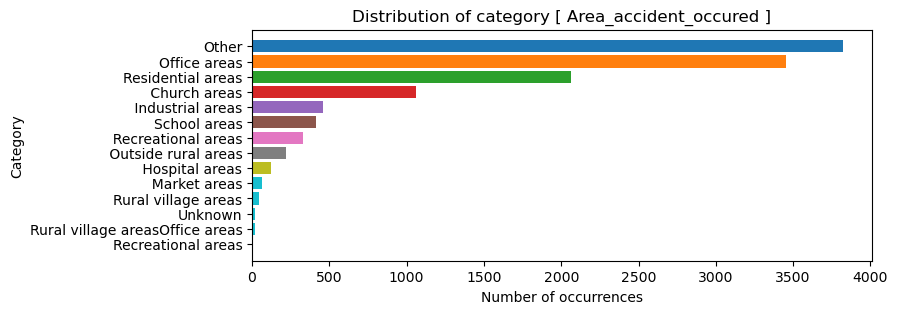

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


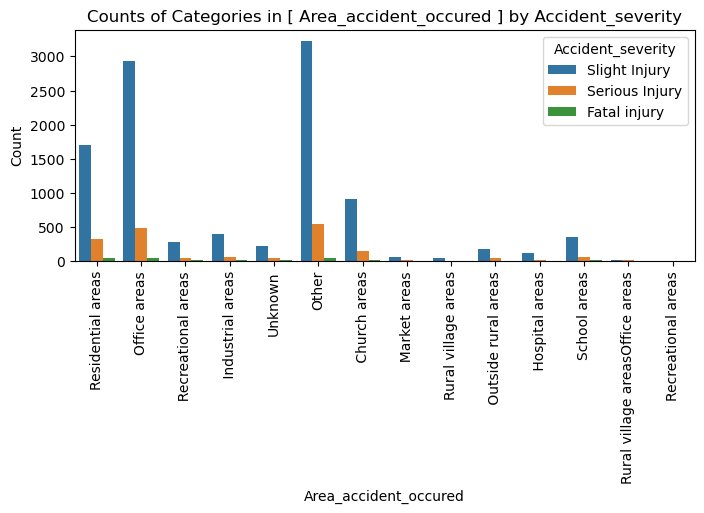

In [38]:
plot_category_distribution(feature="Area_accident_occured" , figsize=(8,3))
plot_category_counts(feature="Area_accident_occured", ticks_rotation=90 , figsize=(8,3))

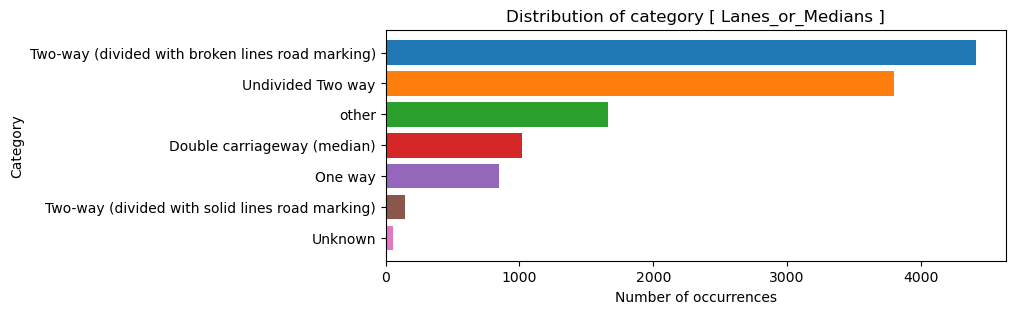

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


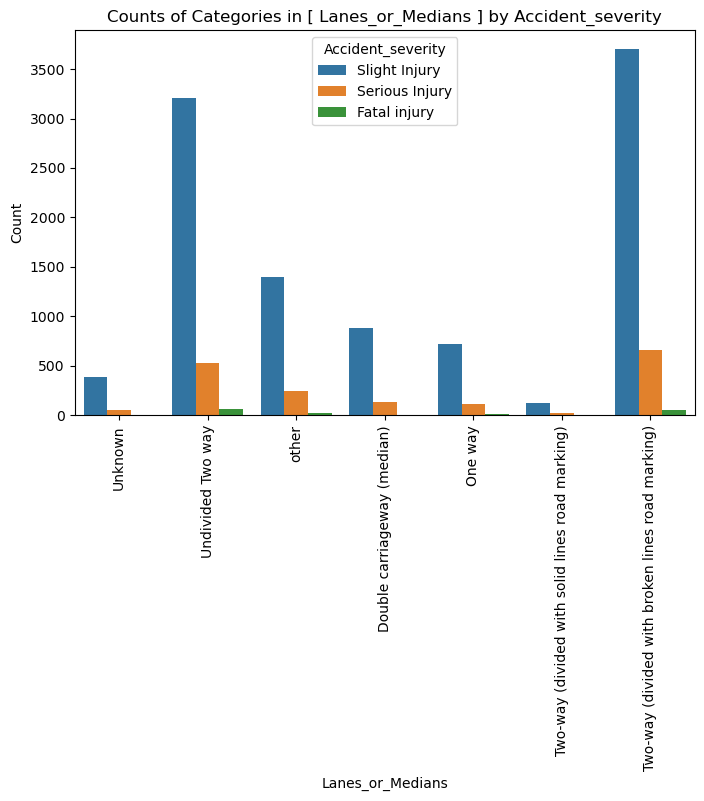

In [39]:
plot_category_distribution(feature="Lanes_or_Medians" , figsize=(8,3))
plot_category_counts(feature="Lanes_or_Medians", ticks_rotation=90 , figsize=(8,5))

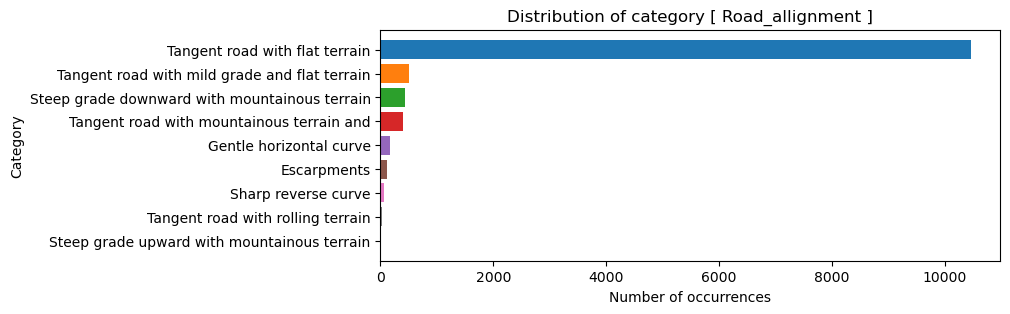

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


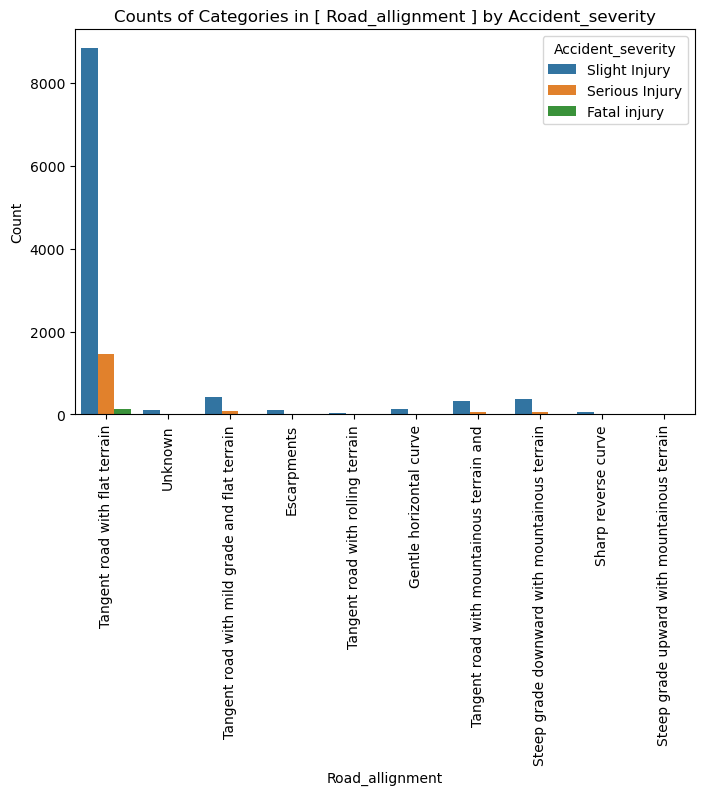

In [40]:
plot_category_distribution(feature="Road_allignment" , figsize=(8,3))
plot_category_counts(feature="Road_allignment", ticks_rotation=90 , figsize=(8,5))

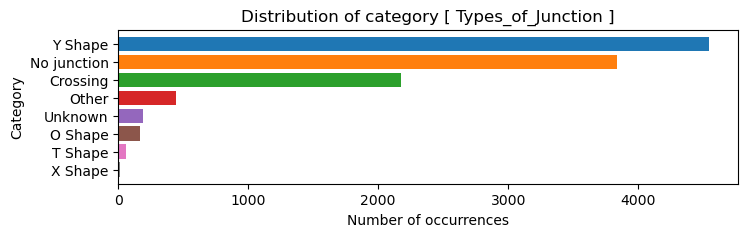

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


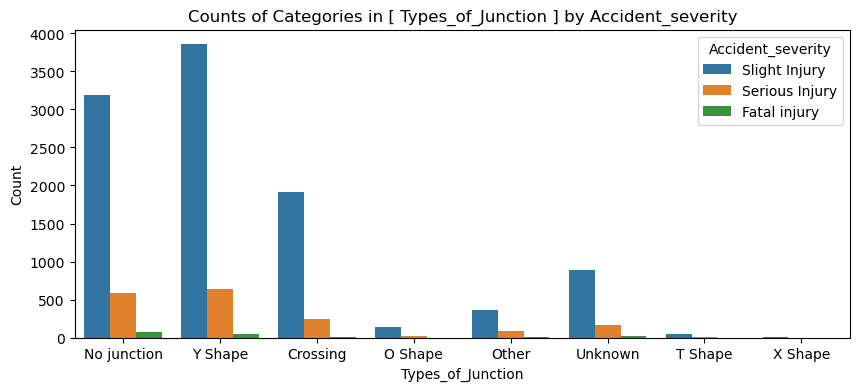

In [41]:
plot_category_distribution(feature="Types_of_Junction" , figsize=(8,2))
plot_category_counts(feature="Types_of_Junction", ticks_rotation=0 , figsize=(10,4))

In [42]:
print(categorical_features)

['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


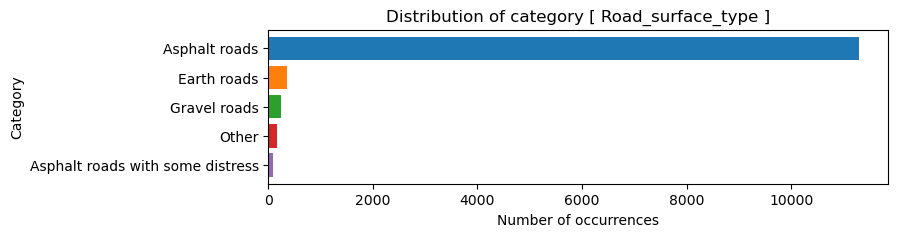

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


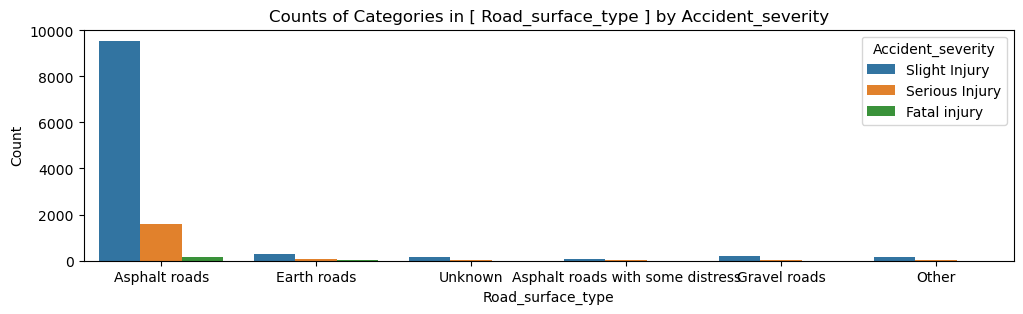

In [43]:
plot_category_distribution(feature="Road_surface_type" , figsize=(8,2))
plot_category_counts(feature="Road_surface_type", ticks_rotation=0 , figsize=(12,3),counts=False)

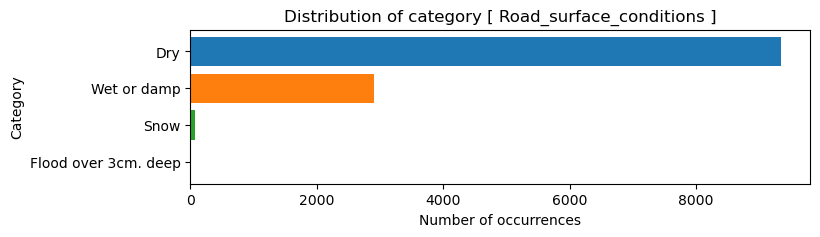

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


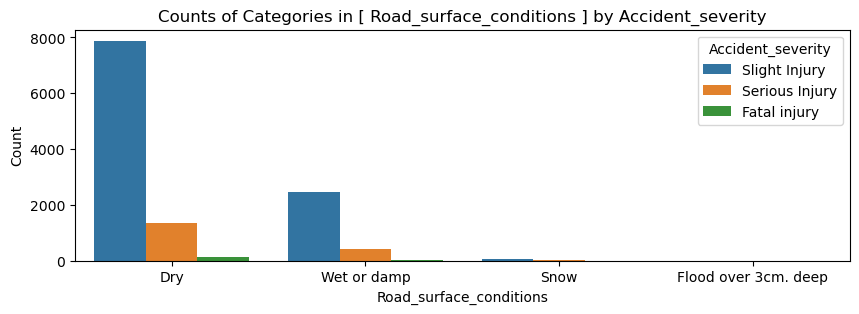

In [44]:
plot_category_distribution(feature="Road_surface_conditions" , figsize=(8,2))
plot_category_counts(feature="Road_surface_conditions", ticks_rotation=0 , figsize=(10,3),counts=False)

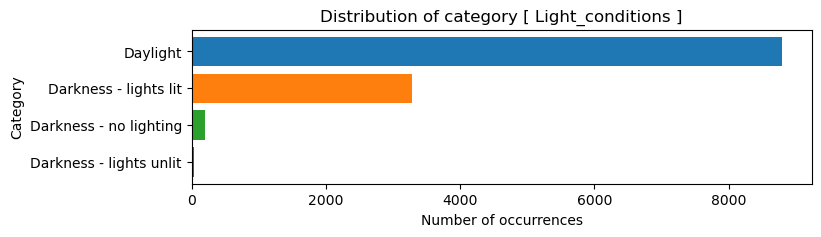

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


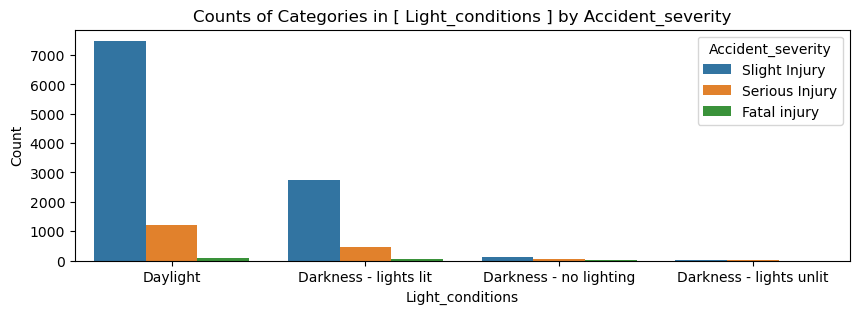

In [45]:
plot_category_distribution(feature="Light_conditions" , figsize=(8,2))
plot_category_counts(feature="Light_conditions", ticks_rotation=0 , figsize=(10,3),counts=False)

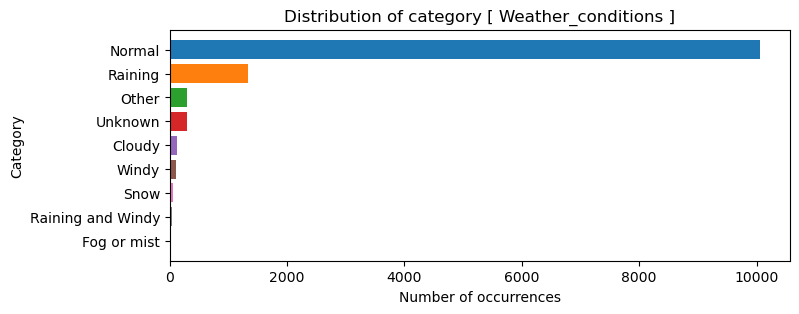

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


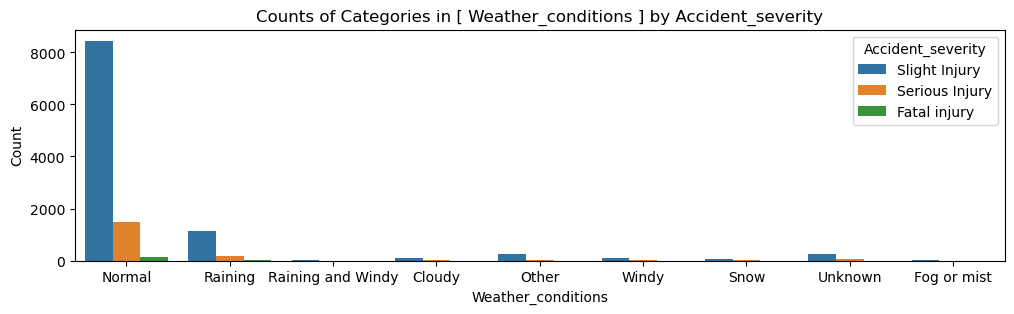

In [46]:
plot_category_distribution(feature="Weather_conditions" , figsize=(8,3))
plot_category_counts(feature="Weather_conditions", ticks_rotation=0 , figsize=(12,3),counts=False)

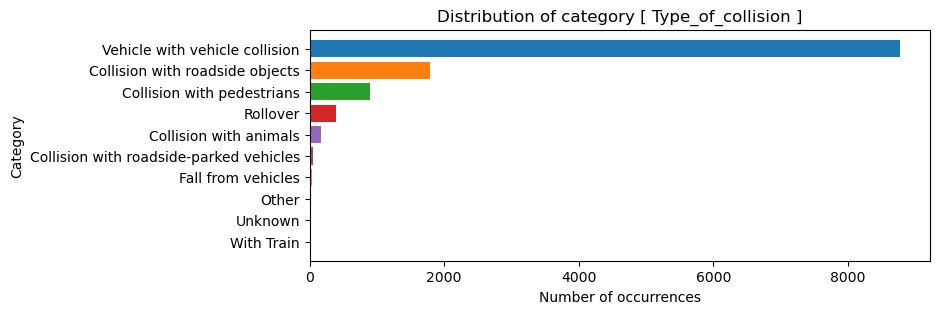

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


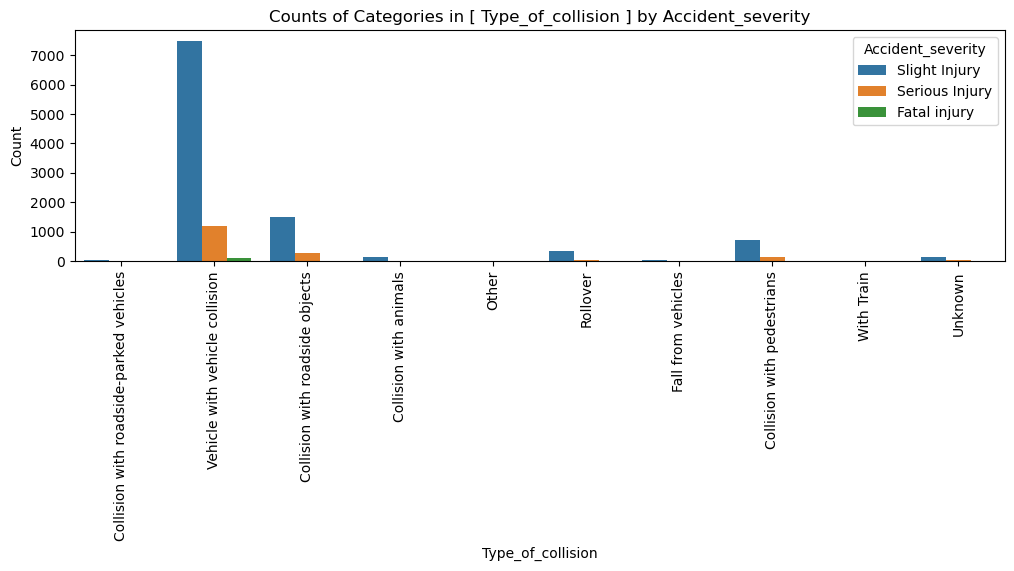

In [47]:
plot_category_distribution(feature="Type_of_collision" , figsize=(8,3))
plot_category_counts(feature="Type_of_collision", ticks_rotation=90 , figsize=(12,3),counts=False)

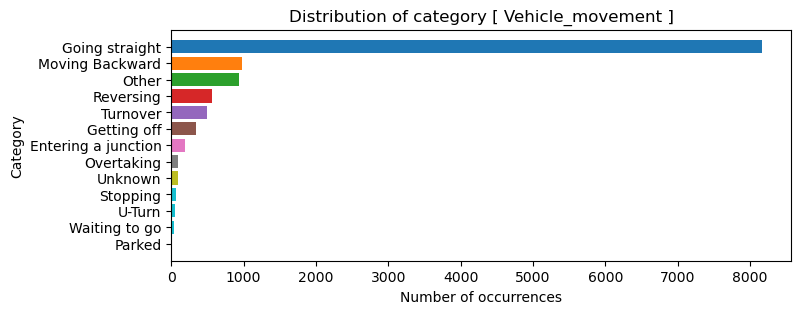

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


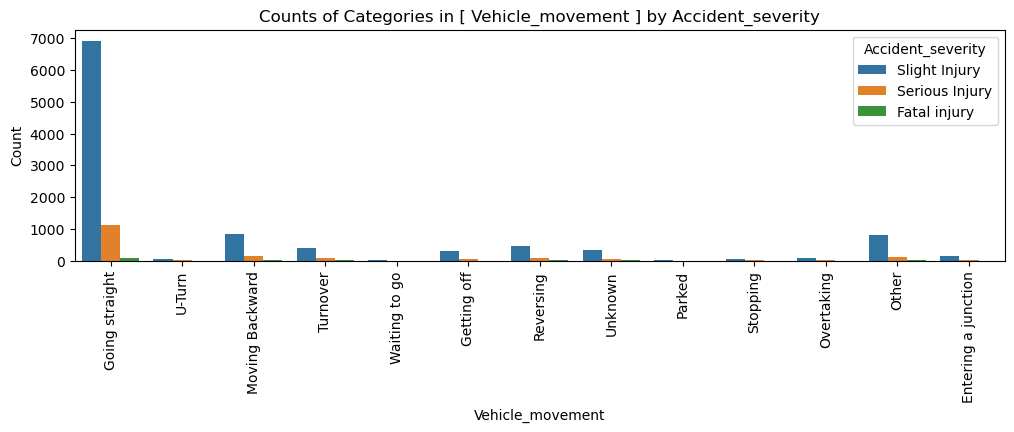

In [48]:
plot_category_distribution(feature="Vehicle_movement" , figsize=(8,3))
plot_category_counts(feature="Vehicle_movement", ticks_rotation=90 , figsize=(12,3),counts=False)

Casualty_class
Driver or rider    4944
Unknown            4443
Pedestrian         1649
Passenger          1280
Name: count, dtype: int64

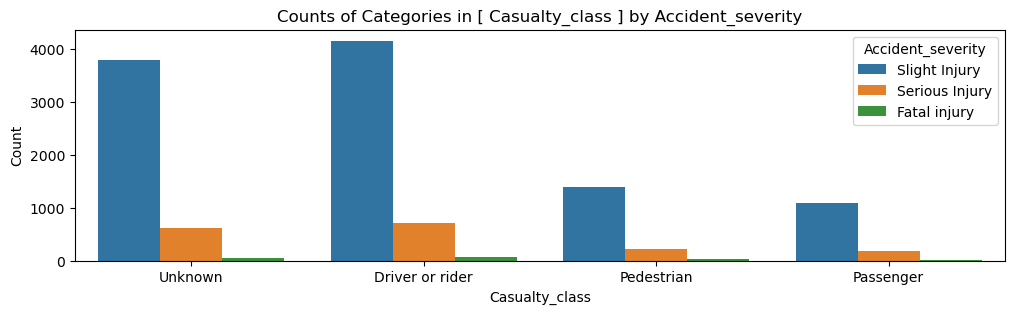

In [49]:
plot_category_counts(feature="Casualty_class", ticks_rotation=0 , figsize=(12,3),counts=True)

Sex_of_casualty
Male       5253
Unknown    4443
Female     2620
Name: count, dtype: int64

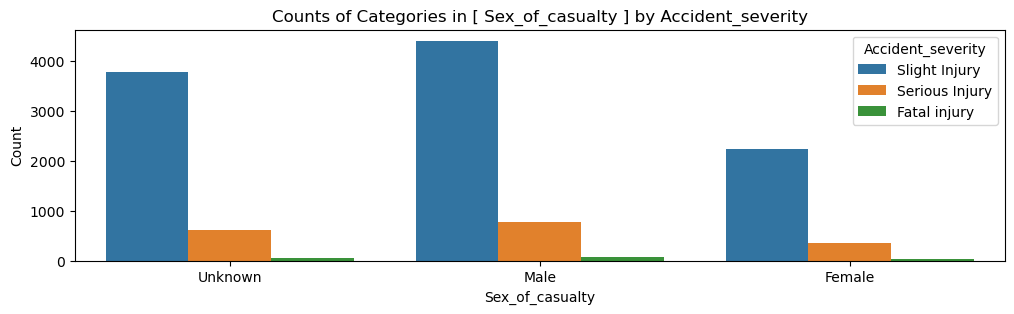

In [50]:
plot_category_counts(feature="Sex_of_casualty", ticks_rotation=0 , figsize=(12,3),counts=True)

Age_band_of_casualty
Unknown     4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: count, dtype: int64

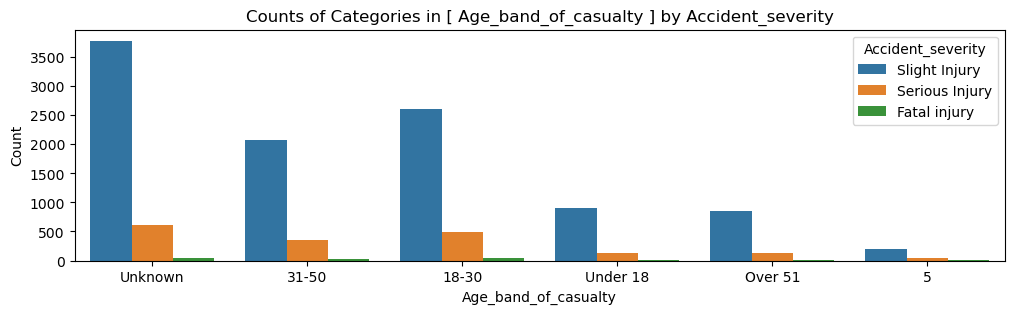

In [51]:
plot_category_counts(feature="Age_band_of_casualty", ticks_rotation=0 , figsize=(12,3),counts=True)

Casualty_severity
3          7076
Unknown    4443
2           771
1            26
Name: count, dtype: int64

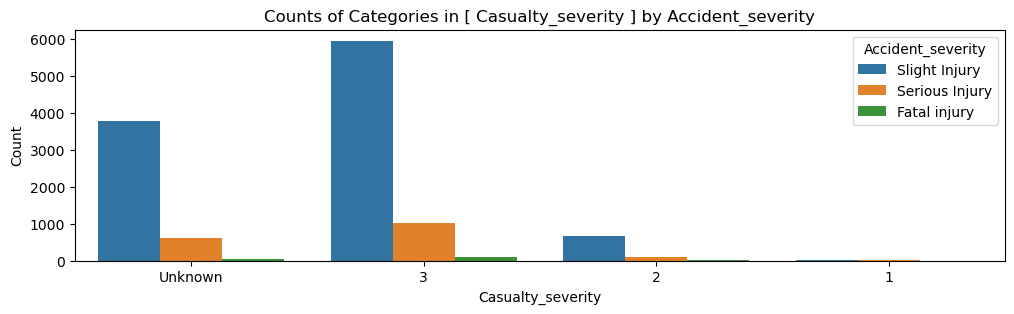

In [52]:
plot_category_counts(feature="Casualty_severity", ticks_rotation=0 , figsize=(12,3),counts=True)

In [53]:
# plot_category_counts(feature="Work_of_casuality", ticks_rotation=0 , figsize=(12,3),counts=True)

In [54]:
# plot_category_counts(feature="Fitness_of_casuality", ticks_rotation=0 , figsize=(12,3),counts=True)

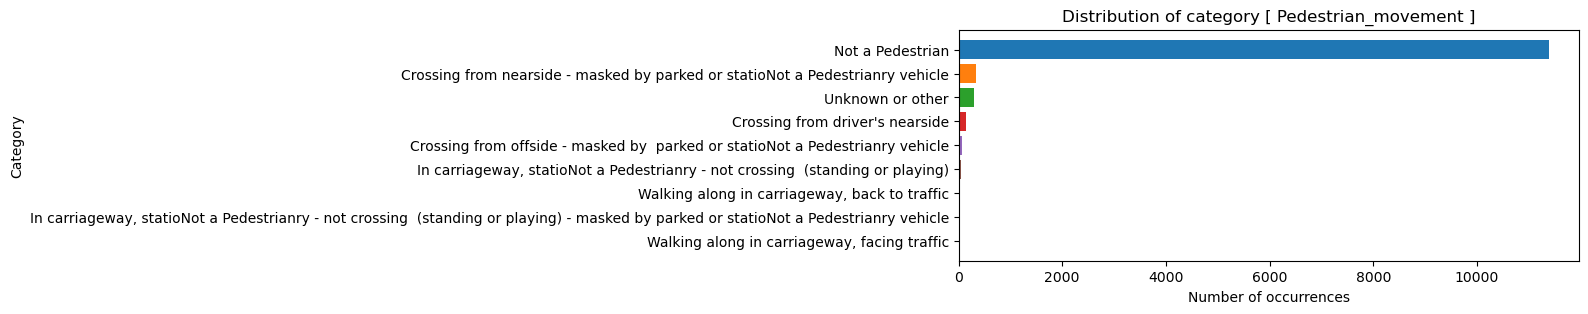

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


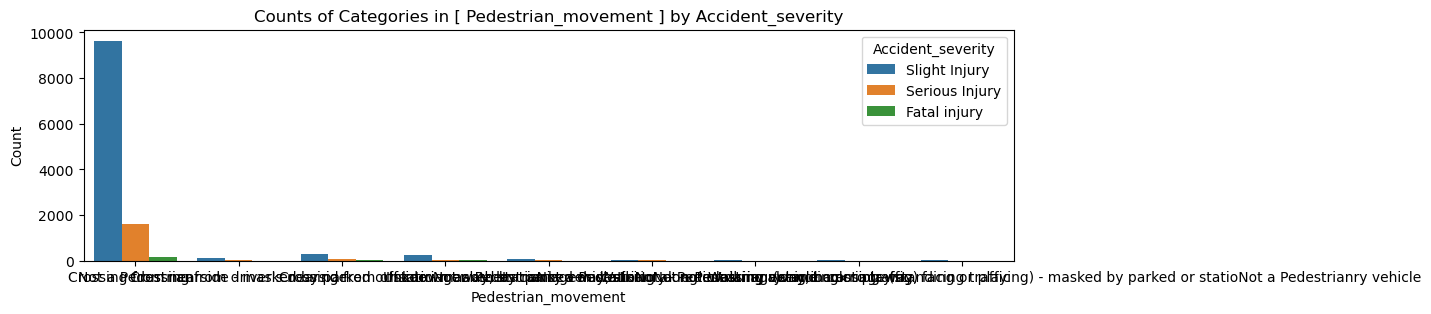

In [55]:
plot_category_distribution(feature="Pedestrian_movement" , figsize=(8,3))
plot_category_counts(feature="Pedestrian_movement", ticks_rotation=0 , figsize=(12,3),counts=False)

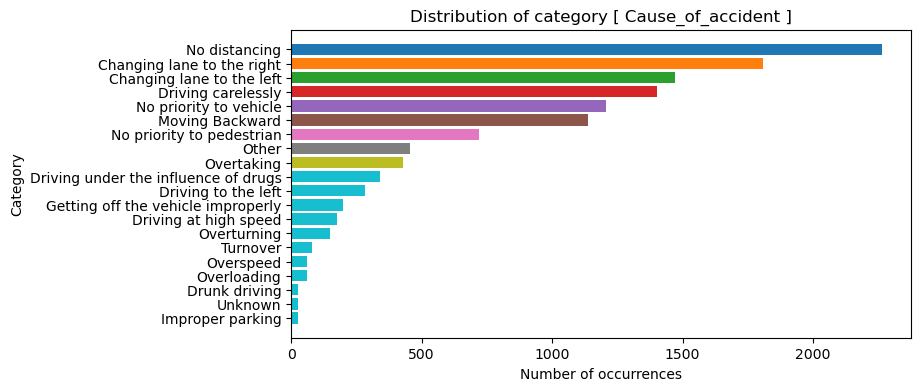

Note: Please pass count paramaeter as 'counts = True' if you want count deatil.


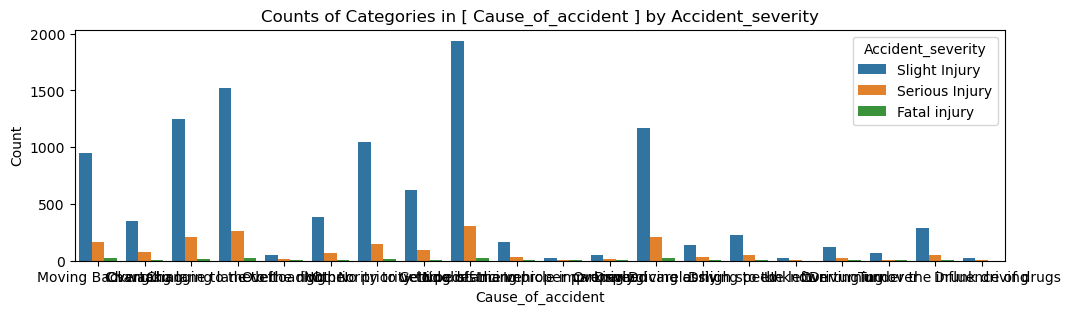

In [56]:
plot_category_distribution(feature="Cause_of_accident" , figsize=(8,4))
plot_category_counts(feature="Cause_of_accident", ticks_rotation=0 , figsize=(12,3),counts=False)

#### Handling Multicolinearty of Training features

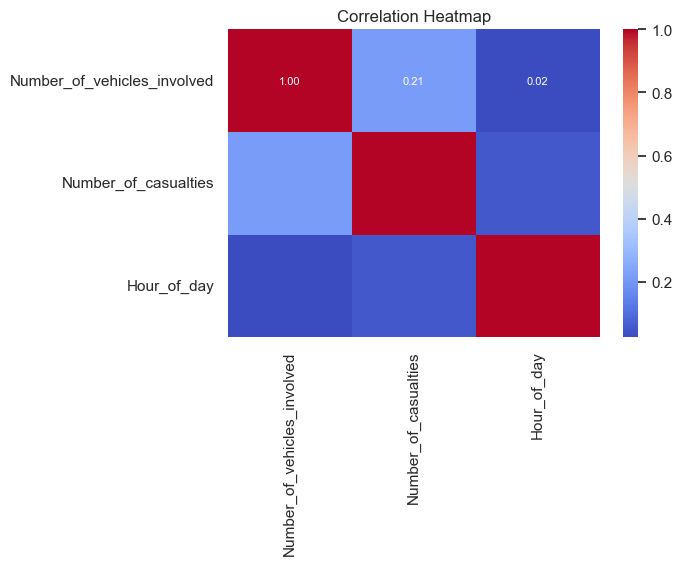

No highly correlated features identified based on correlation coefficients (further analysis might be needed with VIF).


In [57]:
# Calculate correlation matrix
correlation_matrix = df[num_features].corr()
# Create a heatmap to visualize correlations
plt.figure(figsize=(6, 4))
sns.set()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'fontsize': 8})  
# Add labels and title
plt.title('Correlation Heatmap')
plt.show()
# Identify highly correlated features (VIF calculation for additional precision)
highly_correlated = [col for col in correlation_matrix.columns if any(abs(val) > 0.8 for val in correlation_matrix[col].drop(col))]
if highly_correlated:
  print("Potentially highly correlated features:", highly_correlated)
  # Consider further analysis like VIF calculation and domain knowledge before dropping features
else:
  print("No highly correlated features identified based on correlation coefficients (further analysis might be needed with VIF).")

In [58]:
def calculate_vif(df):
    """
    Calculate the Variance Inflation Factor (VIF) for each explanatory variable.

    Args:
        X (pd.DataFrame): Design matrix with explanatory variables.

    Returns:
        pd.DataFrame: DataFrame with VIF values and corresponding feature names.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["Features"] = df.columns
    return vif
vif_df = calculate_vif(df[num_features])
print(vif_df)
print("Values above 5 suggest moderate to severe multicollinearity, and above 10 are considered critical.")

   VIF Factor                     Features
0    5.999953  Number_of_vehicles_involved
1    3.398721         Number_of_casualties
2    5.023532                  Hour_of_day
Values above 5 suggest moderate to severe multicollinearity, and above 10 are considered critical.


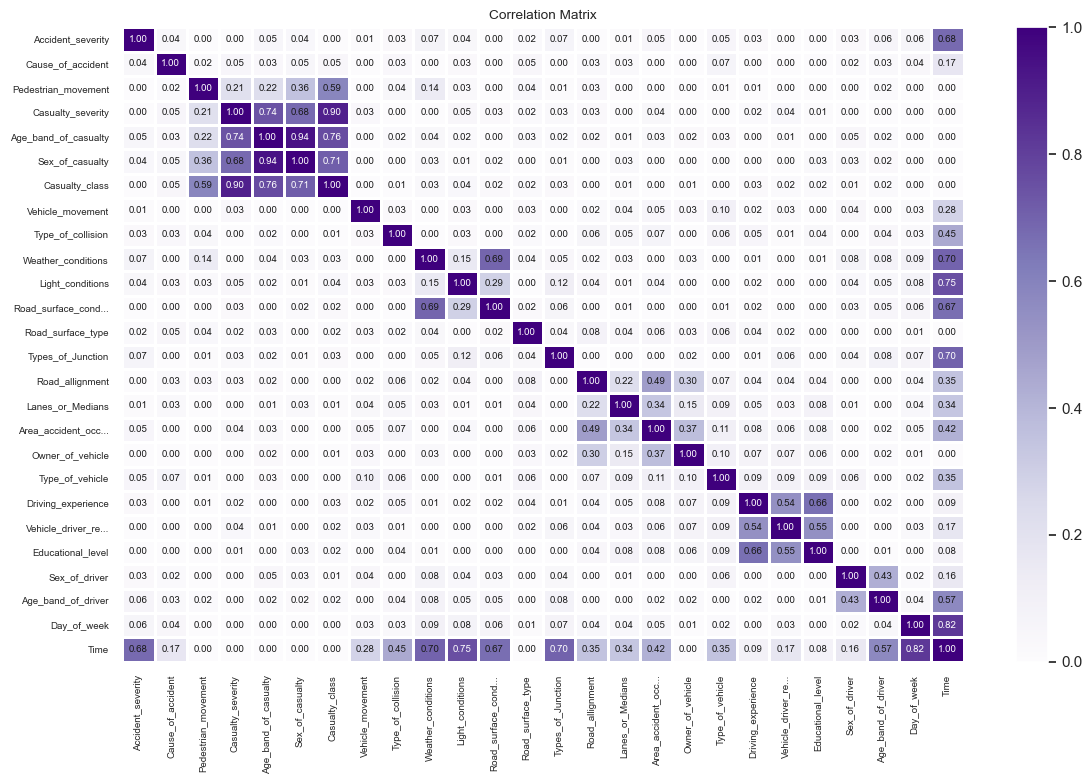

In [59]:
import phik
# cat= [col for col in df.columns if col =="object"]
corr_matrix = df[[feature for feature in df.columns if df[feature].dtypes == 'object']].phik_matrix()
plot_correlation_matrix(corr_matrix.values,
                       x_labels= corr_matrix.columns,
                       y_labels= corr_matrix.index,
                       vmin=0,
                       vmax=1,
                       color_map="Purples",
                       title= "Correlation Matrix",
                       fontsize_factor= .70,
                       figsize= (12,8))

In [60]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes == 'object']
def chi2_test(feature1, feature2, matrix):
    """
    Performs a chi-squared test on two categorical features and updates the results matrix.

    Args:
        feature1 (str): Name of the first categorical feature.
        feature2 (str): Name of the second categorical feature.
        matrix (np.ndarray): The results matrix to store chi-squared values and p-values.

    Returns:
        np.ndarray: The updated results matrix.
    """

    contingency_table = pd.crosstab(df[feature1], df[feature2])

    try:
        chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)
    except ValueError as e:
        print(f"Error performing chi-squared test: {e}")
        return matrix  # Return unmodified matrix on error

    # Calculate indices inside the function for clarity and avoid potential naming conflicts
    feature1_index = categorical_features.index(feature1)  # Find index of feature1
    feature2_index = categorical_features.index(feature2)  # Find index of feature2

    matrix[feature1_index][feature2_index] = chi2
    matrix[feature1_index][feature2_index + 1] = pval

    return matrix

def analyze_multicollinearity(chi2_results, corr_threshold=0.05):
    """
    Identifies potentially high-collinear feature pairs based on a p-value threshold.

    Args:
        chi2_results (pd.DataFrame): DataFrame containing chi-squared values and p-values.
        corr_threshold (float, optional): Threshold for p-value considered high. Defaults to 0.05.

    Returns:
        list: List of potentially high-collinear feature pairs.
    """
    high_corr_features = []
    for i in range(len(categorical_features)):
        for j in range(i + 1, len(categorical_features)):
            if chi2_results.iloc[i, j + 2] < corr_threshold:  # Correct p-value index
                high_corr_features.append((categorical_features[i], categorical_features[j]))

    return high_corr_features

# Analyze pairwise relationships
chi2_results = np.zeros((len(categorical_features), len(categorical_features) * 2))  # Doubled size
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        feature1 = categorical_features[i]
        feature2 = categorical_features[j]
        chi2_results = chi2_test(feature1, feature2, chi2_results.copy())

# Convert matrix to DataFrame with separate columns
column_names = [f"chi2_{col}" for col in categorical_features] + [f"pval_{col}" for col in categorical_features]
chi2_results_df = pd.DataFrame(chi2_results, columns=column_names, index=categorical_features)

# Improved display formatting and handling large DataFrames
print("\nChi-Squared Test Results (Matrix):")
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
display(chi2_results_df)

# Analyze potential multicollinearity
high_corr_features = analyze_multicollinearity(chi2_results_df)

# Print potentially high-collinear features
if high_corr_features:
    print("\nPotentially high-collinear feature pairs:")
    for pair in high_corr_features:
        display(f"- {pair[0]} - {pair[1]}")


Chi-Squared Test Results (Matrix):


chi2_Time  chi2_Day_of_week  chi2_Age_band_of_driver  \
Time                           0.0      21866.884155              8064.925078   
Day_of_week                    0.0          0.000000                60.001237   
Age_band_of_driver             0.0          0.000000                 0.000000   
Sex_of_driver                  0.0          0.000000                 0.000000   
Educational_level              0.0          0.000000                 0.000000   
Vehicle_driver_relation        0.0          0.000000                 0.000000   
Driving_experience             0.0          0.000000                 0.000000   
Type_of_vehicle                0.0          0.000000                 0.000000   
Owner_of_vehicle               0.0          0.000000                 0.000000   
Area_accident_occured          0.0          0.000000                 0.000000   
Lanes_or_Medians               0.0          0.000000                 0.000000   
Road_allignment                0.0          0.000000                 0.000000   
Types_of_Junction              0.0          0.000000                 0.000000   
Road_surface_type              0.0          0.000000                 0.000000   
Road_surface_conditions        0.0          0.000000                 0.000000   
Light_conditions               0.0          0.000000                 0.000000   
Weather_conditions             0.0          0.000000                 0.000000   
Type_of_collision              0.0          0.000000                 0.000000   
Vehicle_movement               0.0          0.000000                 0.000000   
Casualty_class                 0.0          0.000000                 0.000000   
Sex_of_casualty                0.0          0.000000                 0.000000   
Age_band_of_casualty           0.0          0.000000                 0.000000   
Casualty_severity              0.0          0.000000                 0.000000   
Pedestrian_movement            0.0          0.000000                 0.000000   
Cause_of_accident              0.0          0.000000                 0.000000   
Accident_severity              0.0          0.000000                 0.000000   

                         chi2_Sex_of_driver  chi2_Educational_level  \
Time                            2265.532486             6502.533033   
Day_of_week                       17.133164               34.911205   
Age_band_of_driver              3186.493537               24.911671   
Sex_of_driver                      0.000000               11.095423   
Educational_level                  0.000000                0.000000   
Vehicle_driver_relation            0.000000                0.000000   
Driving_experience                 0.000000                0.000000   
Type_of_vehicle                    0.000000                0.000000   
Owner_of_vehicle                   0.000000                0.000000   
Area_accident_occured              0.000000                0.000000   
Lanes_or_Medians                   0.000000                0.000000   
Road_allignment                    0.000000                0.000000   
Types_of_Junction                  0.000000                0.000000   
Road_surface_type                  0.000000                0.000000   
Road_surface_conditions            0.000000                0.000000   
Light_conditions                   0.000000                0.000000   
Weather_conditions                 0.000000                0.000000   
Type_of_collision                  0.000000                0.000000   
Vehicle_movement                   0.000000                0.000000   
Casualty_class                     0.000000                0.000000   
Sex_of_casualty                    0.000000                0.000000   
Age_band_of_casualty               0.000000                0.000000   
Casualty_severity                  0.000000                0.000000   
Pedestrian_movement                0.000000                0.000000   
Cause_of_accident                  0.000000                0.0


Potentially high-collinear feature pairs:


'- Time - Cause_of_accident'

'- Time - Accident_severity'

'- Day_of_week - Cause_of_accident'

'- Day_of_week - Accident_severity'

'- Age_band_of_driver - Cause_of_accident'

'- Age_band_of_driver - Accident_severity'

'- Sex_of_driver - Accident_severity'

'- Educational_level - Accident_severity'

'- Vehicle_driver_relation - Accident_severity'

'- Driving_experience - Accident_severity'

'- Type_of_vehicle - Accident_severity'

'- Owner_of_vehicle - Accident_severity'

'- Area_accident_occured - Cause_of_accident'

'- Area_accident_occured - Accident_severity'

'- Lanes_or_Medians - Accident_severity'

'- Road_allignment - Accident_severity'

'- Types_of_Junction - Cause_of_accident'

'- Types_of_Junction - Accident_severity'

'- Road_surface_type - Accident_severity'

'- Road_surface_conditions - Accident_severity'

'- Light_conditions - Cause_of_accident'

'- Light_conditions - Accident_severity'

'- Weather_conditions - Cause_of_accident'

'- Weather_conditions - Accident_severity'

'- Type_of_collision - Accident_severity'

'- Vehicle_movement - Accident_severity'

'- Casualty_class - Accident_severity'

'- Sex_of_casualty - Accident_severity'

'- Age_band_of_casualty - Cause_of_accident'

'- Age_band_of_casualty - Accident_severity'

'- Casualty_severity - Accident_severity'

'- Pedestrian_movement - Accident_severity'

'- Cause_of_accident - Accident_severity'

In [61]:
print(categorical_features)
print(num_features)

['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']
['Number_of_vehicles_involved', 'Number_of_casualties', 'Hour_of_day']


In [62]:
# Removing features with Multicollinearity or similar info
columns = ["Time"]
          # ,"Educational_level","Casualty_class","Sex_of_casualty","Age_band_of_casualty","Pedestrian_movement",
          # "Vehicle_driver_relation","Owner_of_vehicle", "Sex_of_driver", "Road_surface_type" , "Age_band_of_driver",
          # "Type_of_vehicle",]
df.drop(columns=columns , inplace=True)

## 03_Feature Engineering & Selection
* Removing Outliers
* Normalize/scale/transform features.
* Select relevant features (variables) for modeling.
* Create new features if needed.

#### Handling Outliers

In [63]:
display(df.head(1))
skim(df)

Day_of_week Age_band_of_driver Sex_of_driver  Educational_level  \
0      Monday              18-30          Male  Above high school   

  Vehicle_driver_relation Driving_experience Type_of_vehicle Owner_of_vehicle  \
0                Employee              1-2yr      Automobile            Owner   

  Area_accident_occured Lanes_or_Medians                 Road_allignment  \
0     Residential areas          Unknown  Tangent road with flat terrain   

  Types_of_Junction Road_surface_type Road_surface_conditions  \
0       No junction     Asphalt roads                     Dry   

  Light_conditions Weather_conditions  \
0         Daylight             Normal   

                         Type_of_collision  Number_of_vehicles_involved  \
0  Collision with roadside-parked vehicles                            2   

   Number_of_casualties Vehicle_movement Casualty_class Sex_of_casualty  \
0                     2   Going straight        Unknown         Unknown   

  Age_band_of_casualty Casualty_severity Pedestrian_movement  \
0              Unknown           Unknown    Not a Pedestrian   

  Cause_of_accident Accident_severity  Hour_of_day  
0   Moving Backward     Slight Injury           17

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 12316  │ │ string      │ 25    │                                                          │
│ │ Number of columns │ 28     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0  ┃ p25   ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Number_of_vehicles_involve │    0 │      0 │      2 │   0.69 │   1 │     2 │    2 │    2 │     7 │   ▂▇▂   │  │
│ │ d                          │      │        │        │        │     │       │      │      │       │         │  │
│ │ Number_of_casualties       │    0 │      0 │    1.5 │      1 │   1 │     1 │    1 │    2 │     8 │   ▇▁    │  │
│ │ Hour_of_day                │    0 │      0 │     14 │    5.2 │   0 │    10 │   15 │   18 │    23 │ ▁▂▅▆▇▃  │  │
│ └────────────────────────────┴──────┴────────┴────────┴────────┴─────┴───────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Day_of_week                           │     0 │         0 │                        1 │               12316 │  │
│ │ Age_band_of_driver                    │     0 │         0 │                      1.2 │               14726 │  │
│ │ Sex_of_driver                         │     0 │         0 │                        1 │               12316 │  │
│ │ Educational_level                     │     0 │         0 │                      2.6 │               31903 │  │
│ │ Vehicle_driver_relation               │     0 │         0 │                        1 │               12316 │  │
│ │ Driving_experience                    │     0 │         0 │                      1.3 │               16038 │  │
│ │ Type_of_vehicle                       │     0 │         0 │                      1.8 │               21717 │  │
│ │ Owner_of_vehicle                      │     0 │         0 │                        1 │               12316 │  │
│ │ Area_accident_occured                 │     0 │         0 │                      1.9 │               23489 │  │
│ │ Lanes_or_Medians                      │     0 │         0 │                      4.1 │               50111 │  │
│ │ Road_allignment                       │     0 │         0 │                      5.1 │               62467 │  │
│ │ Types_of_Junction                     │     0 │         0 │                      1.7 │               20932 │  │
│ │ Road_surface_type                     │     0 │         0 │                        2 │               24536 │  │
│ │ Road_surface_conditions               │     0 │     

In [64]:
def remove_outliers_by_featur(df, column_name, n_std=1.5):
    mean = df[column_name].mean()
    sd = df[column_name].std()
    lower_fence = mean - (n_std * sd)
    upper_fence = mean + (n_std * sd)
    
    # Identify outliers
    outliers = df[(df[column_name] < lower_fence) | (df[column_name] > upper_fence)]
    print(f"Identified outliers: {len(outliers)}")
        # Remove outliers
    df.drop(outliers.index, inplace=True)

def remove_outliers_by_feature_class(df, column_name, class_column, n_std = 1.5):
    for class_value in df[class_column].unique():
        class_df = df[df[class_column] == class_value]
        mean = class_df[column_name].mean()
        sd = class_df[column_name].std()
        lower_fence = mean - (n_std * sd)
        upper_fence = mean + (n_std * sd)
        
        # Identify outliers for this class
        outliers = class_df[(class_df[column_name] < lower_fence) | (class_df[column_name] > upper_fence)]
        print(f"Identified outliers for class '{class_value}': {len(outliers)}")
        
        # Remove outliers for this class
        df.drop(outliers.index, inplace=True)

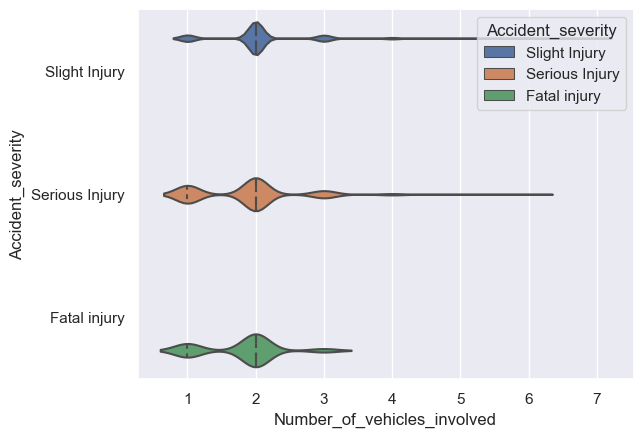

In [65]:
sns.violinplot(data=df, x="Number_of_vehicles_involved",y="Accident_severity",split=False, inner="quart",hue="Accident_severity");

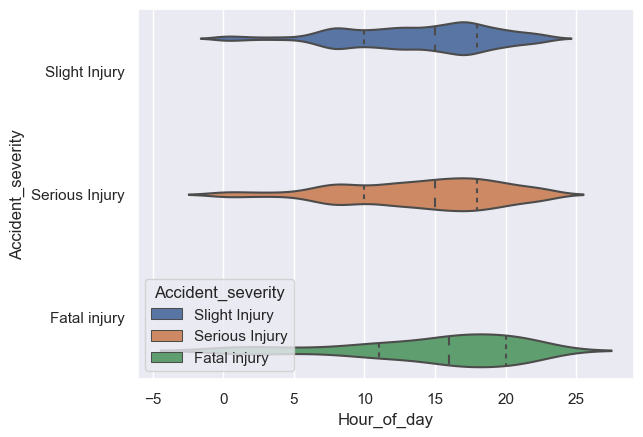

In [66]:
sns.violinplot(data=df, x="Hour_of_day",y="Accident_severity",split=False, inner="quart",hue="Accident_severity");

In [67]:
# remove_outliers_by_featur(df=df, column_name="Hour_of_day", n_std=1.7)

In [68]:
import copy
df_cln = copy.deepcopy(df)
df_cln.shape

(12316, 28)

#### Normalize/scaling/transformation

In [69]:
num_total_duplicates = len(df_cln) - len(df_cln.drop_duplicates())
print(f"Total number of duplicate rows: {num_total_duplicates}")

Total number of duplicate rows: 0


In [70]:
df_cln.sample(2)

Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
10800      Monday            Over 51          Male         High school   
6295       Sunday            Unknown          Male  Junior high school   

      Vehicle_driver_relation Driving_experience Type_of_vehicle  \
10800                   Owner              1-2yr         Unknown   
6295                 Employee              2-5yr      Automobile   

      Owner_of_vehicle Area_accident_occured   Lanes_or_Medians  \
10800            Owner     Residential areas  Undivided Two way   
6295             Owner                 Other  Undivided Two way   

                                 Road_allignment Types_of_Junction  \
10800             Tangent road with flat terrain           Unknown   
6295   Tangent road with mountainous terrain and           Y Shape   

                      Road_surface_type Road_surface_conditions  \
10800  Asphalt roads with some distress             Wet or damp   
6295                      Asphalt roads                     Dry   

      Light_conditions Weather_conditions               Type_of_collision  \
10800         Daylight            Raining  Vehicle with vehicle collision   
6295          Daylight             Normal      Collision with pedestrians   

       Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
10800                            2                     1            Other   
6295                             2                     1   Going straight   

        Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
10800  Driver or rider            Male             Under 18                 3   
6295           Unknown         Unknown              Unknown           Unknown   

      Pedestrian_movement          Cause_of_accident Accident_severity  \
10800    Not a Pedestrian         Driving carelessly     Slight Injury   
6295     Not a Pedestrian  No priority to pedestrian     Slight Injury   

       Hour_of_day  
10800            9  
6295            20

In [71]:
y = df_cln["Accident_severity"]
X = df_cln.drop(columns=["Accident_severity"] , axis=1).copy()
print(X.shape, len(y))

(12316, 27) 12316


In [72]:
def encode_categorical_features(df):
    """Encodes categorical features in a pandas DataFrame using label encoding.

    Args:
        df (pandas.DataFrame): The DataFrame containing the features.

    Returns:
        pandas.DataFrame: The DataFrame with encoded categorical features.
    """
    # Select categorical features
    cat_features = [feature for feature in df.columns if df[feature].dtypes == 'object']

    # Create a label encoder instance
    le = LabelEncoder()

    # Apply label encoding only to specified categorical columns
    for col in cat_features:
        df[col] = le.fit_transform(df[col])

    # Return the encoded DataFrame
    return df

In [73]:
# Encoding Target classes into numbers
y_encoded = replace_multiple_values(y, replacements={'Slight Injury':0, 'Serious Injury':1, 'Fatal injury':2})

In [74]:
X_encoded = encode_categorical_features(df=X)
X_encoded.head(2)

Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0            1                   0              1                  0   
1            1                   1              1                  4   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   0                0   
1                        0                   3               11   

   Owner_of_vehicle  Area_accident_occured  Lanes_or_Medians  Road_allignment  \
0                 3                      9                 5                5   
1                 3                      6                 4                5   

   Types_of_Junction  Road_surface_type  Road_surface_conditions  \
0                  1                  0                        0   
1                  1                  0                        0   

   Light_conditions  Weather_conditions  Type_of_collision  \
0                 3                   2                  3   
1                 3                   2                  8   

   Number_of_vehicles_involved  Number_of_casualties  Vehicle_movement  \
0                            2                     2                 2   
1                            2                     2                 2   

   Casualty_class  Sex_of_casualty  Age_band_of_casualty  Casualty_severity  \
0               3                2                     5                  3   
1               3                2                     5                  3   

   Pedestrian_movement  Cause_of_accident  Hour_of_day  
0                    5                  9           17  
1                    5                 16           17

#### Selecting relevant features (variables) for modeling.

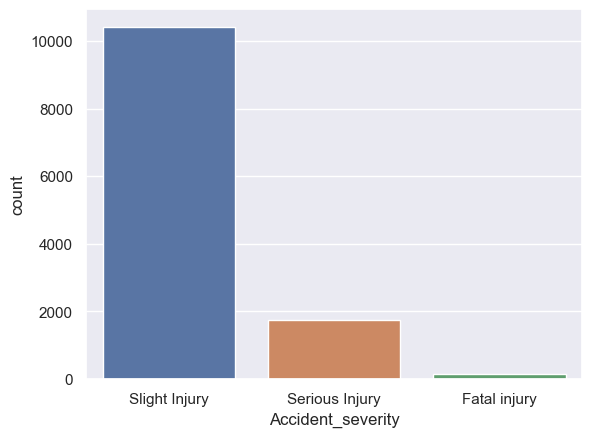

In [75]:
sns.countplot(df_cln, x="Accident_severity")
plt.show()

#### Imbalance Class Handling - Using Upsampling Technique

##### Resampling with Sklean

##### Resampling with SMOTE

In [76]:
from imblearn.over_sampling import SMOTE , ADASYN , BorderlineSMOTE
from imblearn.combine import SMOTEENN

###### SMOTE: Synthetic Minority Oversampling Technique:
* SMOTE is an oversampling technique specifically designed for imbalanced datasets.
* 
It generates synthetic samples for the minority class, overcoming the overfitting problem posed by random oversampling
* How it works:
    - Set the total number of oversampling observations (N). Typically, a 1:1 class distribution is chosen, but this can be adjusted based on need.
    - Randomly select a positive class instance
    - Obtain the K nearest neighbors (usually 5) for that instance
Interpolate new synthetic instances based on the feature space and the differences in distance between the feature vector and its neighbors.

(31245, 27) 31245


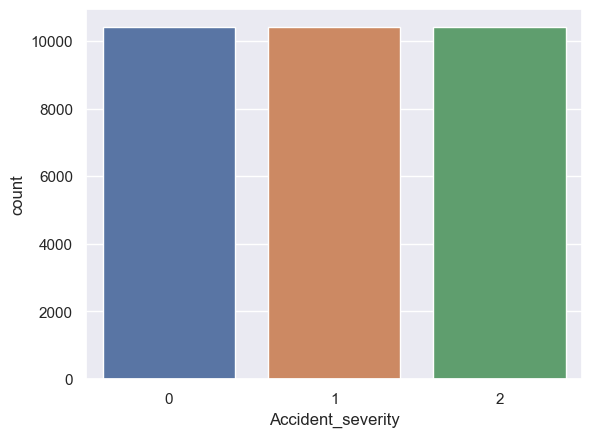

In [80]:
# Apply SMOTE to balance the target classes but it is not good for multiclass
smote = SMOTE(random_state=42 , k_neighbors=5)
X_balanced, y_balanced = smote.fit_resample(X_encoded, y_encoded)
print(X_balanced.shape, len(y_balanced))
sns.countplot(x=y_balanced);

###### ADASYN (Adaptive Synthetic Sampling):
* ADASYN generates synthetic samples for the minority class by focusing on samples that are difficult to classify
* 
It adapts the density distribution of the minority class.

(31693, 27) 31693


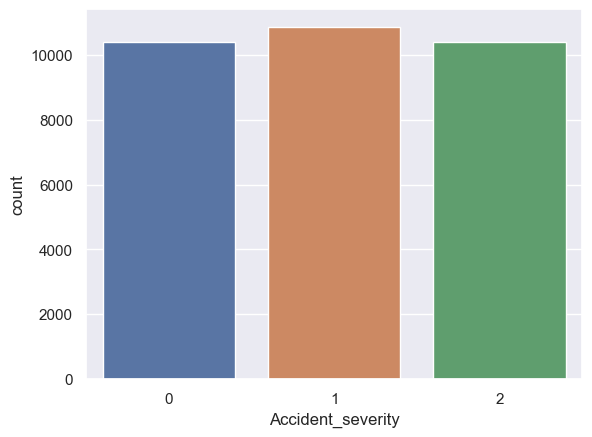

In [82]:
#Assuming you have X_train and y_train
adasyn = ADASYN(random_state=42, n_neighbors=5)
X_adasyn, y_adasyn = adasyn.fit_resample(X_encoded, y_encoded)
print(X_adasyn.shape, len(y_adasyn))
sns.countplot(x=y_adasyn);

##### Borderline-SMOTE:
* Borderline-SMOTE focuses on the borderline instances (near the decision boundary) of the minority class
* 
It generates synthetic samples for these borderline instances.

(31245, 27) 31245


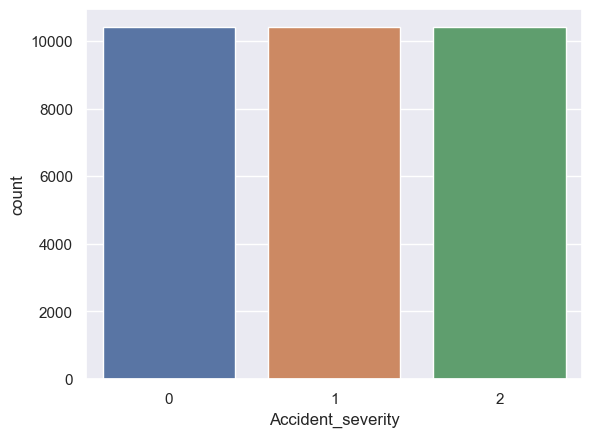

In [83]:
# Assuming you have X_train and y_train
borderline_smote = BorderlineSMOTE(random_state=42, k_neighbors=5)
X_border, y_border = borderline_smote.fit_resample(X_encoded, y_encoded)
print(X_border.shape, len(y_border))
sns.countplot(x=y_border);

##### Combination Methods:
Combination methods combine multiple resampling techniques But works good with binary Classes..

(24156, 27) 24156


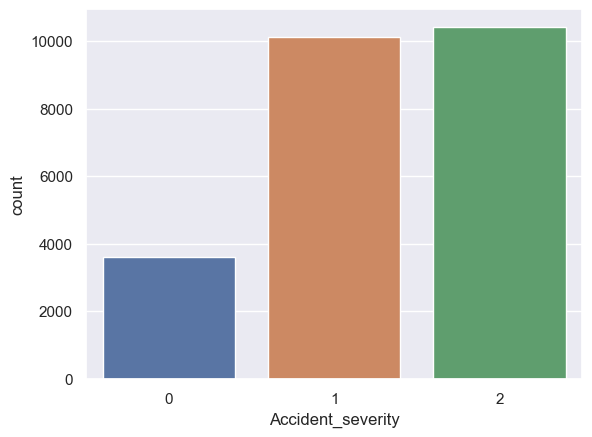

In [84]:
smoteenn = SMOTEENN(random_state=42)
X_combined, y_combined = smoteenn.fit_resample(X_encoded, y_encoded)
print(X_combined.shape, len(y_combined))
sns.countplot(x=y_combined);

#### Final Feature Selection using mlxtend library

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_border, y_border, test_size=0.2, random_state=42)
X_train_balance, X_test_balance, y_train_balance, y_test_balance = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)
X_train_border, X_test_border, y_train_border, y_test_border = train_test_split(X_border, y_border, test_size=0.2, random_state=42)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

In [86]:
# Classifier used for Feature Selections
rf = RandomForestClassifier(n_estimators=100)  # Adjust n_estimators as needed
etc = ExtraTreesClassifier(n_estimators=100)
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

In [87]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
# Multiclass Random Forest Classifier with ExhaustiveFeatureSelector only use this if you have more computing power.
# Feature selector with F1-weighted scoring
sel_rf = EFS(rf, max_features=4, scoring='f1_weighted', cv=5)

In [88]:
# Only run this if have heavy computing power.
# model_rf = sel_rf.fit(X_train,y_train) 

In [89]:
# Classifier for multiclass classification ExhaustiveFeatureSelector only use this if you have more computing power.
lr = LogisticRegression(multi_class='multinomial') # If binary class you can leave empty
# Feature selector with suitable scoring for multiclass
sel_lr = EFS(lr, max_features=4, scoring='f1_weighted', cv=5)

In [127]:
# model_lr = sel_lr.fit(X_train,y_train) # Only run this if have heavy computing power.

#### Final Feature Selection using sklearn 'SequentialFeatureSelector' 

In [98]:
sfs_rf = SequentialFeatureSelector(rf, n_features_to_select= 25, direction='backward', scoring='f1_weighted', n_jobs=-1,cv=5)
sfs_rf.fit(X_train_border,y_train_border)
# sfs_etc = SequentialFeatureSelector(etc, n_features_to_select= 25, direction='backward', scoring='f1_weighted', n_jobs=-1,cv=5)
# sfs_etc.fit(X_train_border,y_train_border)

SequentialFeatureSelector(direction='backward',
                          estimator=RandomForestClassifier(),
                          n_features_to_select=25, n_jobs=-1,
                          scoring='f1_weighted')

In [99]:
# selected_features
selected_feature_indices = np.where(sfs_rf.support_)[0]  # Get indices of selected features
X_train_border = X_train_border.iloc[:,selected_feature_indices]
X_test_border = X_test_border.iloc[:,selected_feature_indices]
X_train_border.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident',
       'Hour_of_day'],
      dtype='object')

In [100]:
def feature_importance_plot(df, model=None, top_n=25 , figsize=(11,7)):
  """
  Creates a bar plot visualizing feature importances from a model or DataFrame.

  Args:
      df (pd.DataFrame): DataFrame containing features and their importances (optional).
      model (object, optional): Trained model object with feature_importances_ attribute (optional).
      top_n (int, optional): Number of top features to display (default: 10).

  Returns:
      None
  """

  # Check if feature importances are provided in either df or model
  if model is not None:
    feature_importance_df = pd.DataFrame({'Feature': df.columns, 'Importance': model.feature_importances_})
  elif 'Importance' in df.columns:
    feature_importance_df = df.copy()
  else:
    raise ValueError("Feature importances not found in either provided DataFrame or model.")

  # Sort and select top features
  feature_importance_df.sort_values(by="Importance", ascending=False, inplace=True)
  top_features = feature_importance_df.head(top_n)

  # Create the bar plot with seaborn
  plt.figure(figsize=figsize)
  ax = sns.barplot(x="Importance", y="Feature", data=top_features)
  ax.set_title(f"Top {top_n} Feature Importances")
  ax.set_xlabel("Importance")
  ax.set_ylabel("Feature")    
  plt.show()

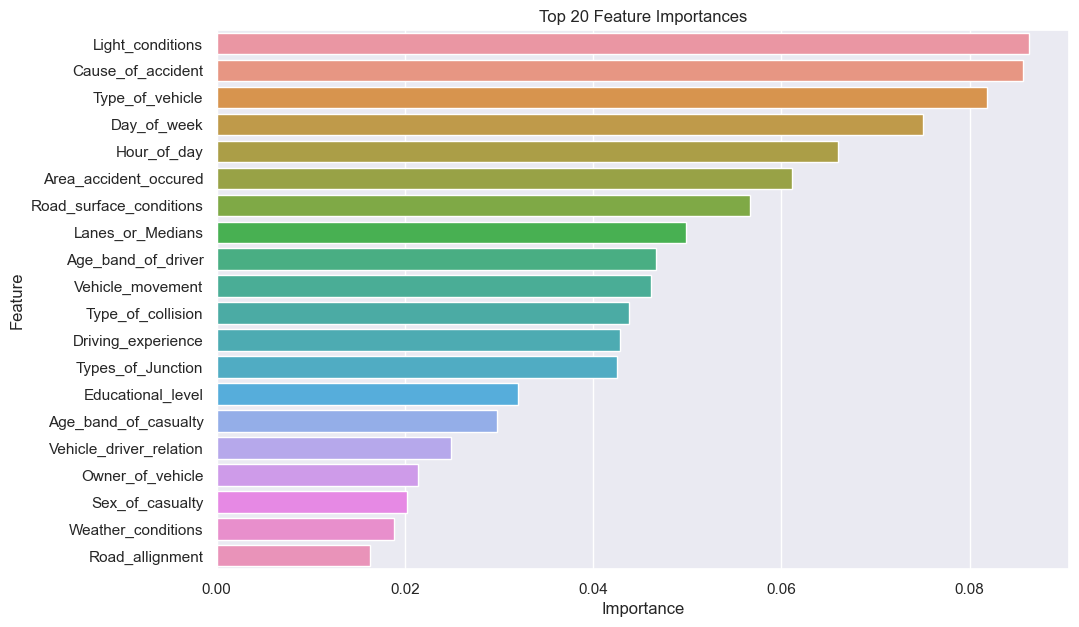

In [101]:
# Train a decision tree classifier
dtc = DecisionTreeClassifier()
# dtc.fit(X_train_balanced, y_train_balanced)
# dtc.fit(X_train_adasyn, y_train_adasyn)
# dtc.fit(X_train_border, y_train_border)
dtc.fit(X_train_border, y_train_border)
# Get feature importance
# dtc_feature_imp = dtc.feature_importances_
# print("Feature Importance:")
# for feature, importance in zip(X.columns, dtc_feature_imp):
#     print(f"{feature}: {importance:.4f}")
feature_importance_plot(df=X_train_border , model=dtc ,top_n=20)

In [102]:
# plt.figure(figsize=(10, 6))
# ax = sns.barplot(x=X.columns, y=dtc_feature_imp, orient='v')
# # Add value labels on top of each bar
# for i, v in enumerate(dtc_feature_imp):
#     ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
# plt.xlabel("Features")
# plt.ylabel("Importance")
# plt.title("Feature Importance")
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

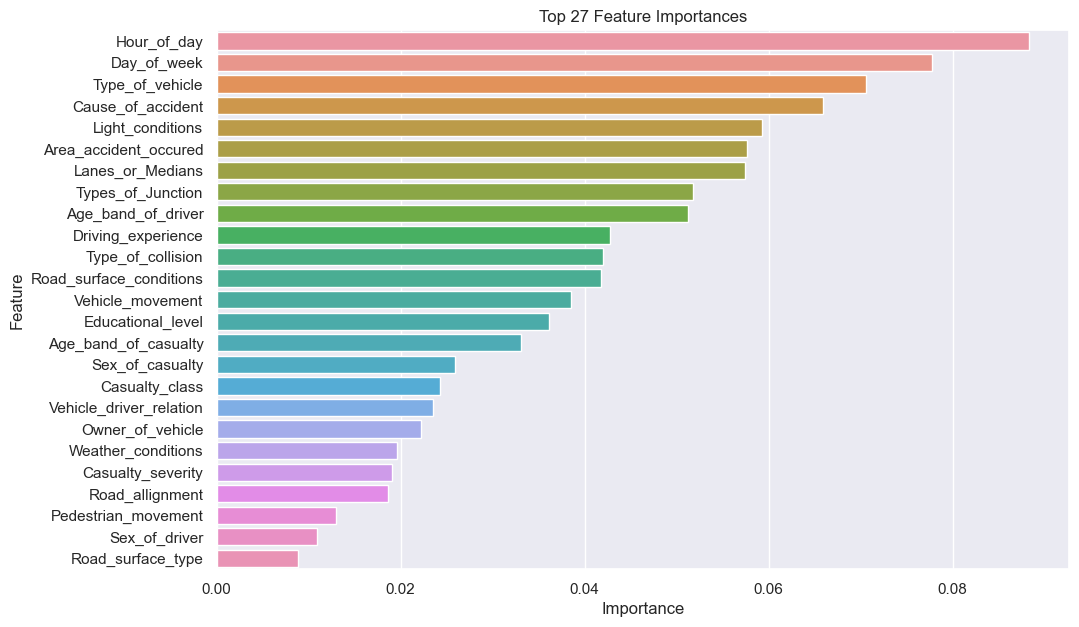

In [103]:
# Getting important features with RF
rfc = RandomForestClassifier()
# rfc.fit(X_train_adasyn, y_train_adasyn)
rfc.fit(X_train_border, y_train_border)
feature_importance_plot(df=X_train_border , model=rfc ,top_n=27)

In [104]:
# # Train a XGBFC classifier
# xgb = XGBRFClassifier()
# xgb.fit(X_train_border, y_train_border)
# # Get feature importance
# feature_importance_plot(df=X_train_border , model=xgb ,top_n=27)

#### Final Feature Selection using selectkbest

In [105]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_classif, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_classif, k=x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)

    return X_train_fs, X_test_fs, fs_corr

def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_classif, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_classif, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)

    return X_train_fs, X_test_fs, fs_info

In [106]:
X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train=X_train_border, y_train=y_train_border, X_test=X_test_border)
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train=X_train_border, y_train=y_train_border, X_test=X_test_border)

Feature Day_of_week: 137.120703
Feature Age_band_of_driver: 1151.617828
Feature Sex_of_driver: 272.004274
Feature Educational_level: 32.281098
Feature Vehicle_driver_relation: 117.716548
Feature Driving_experience: 154.282173
Feature Type_of_vehicle: 20.925576
Feature Owner_of_vehicle: 306.232231
Feature Area_accident_occured: 40.718507
Feature Lanes_or_Medians: 360.584564
Feature Road_allignment: 55.542813
Feature Types_of_Junction: 488.113410
Feature Road_surface_type: 229.049992
Feature Road_surface_conditions: 195.056411
Feature Light_conditions: 1485.851927
Feature Weather_conditions: 224.907123
Feature Type_of_collision: 24.864018
Feature Vehicle_movement: 204.932651
Feature Casualty_class: 383.459914
Feature Sex_of_casualty: 574.733960
Feature Age_band_of_casualty: 223.242648
Feature Casualty_severity: 781.596126
Feature Pedestrian_movement: 270.184246
Feature Cause_of_accident: 423.304662
Feature Hour_of_day: 258.727308


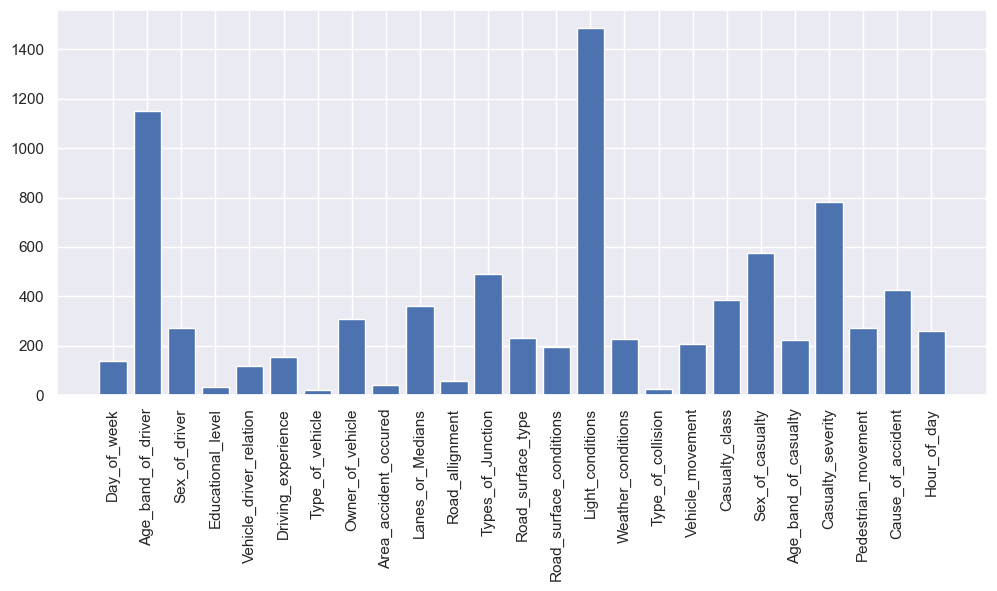

Feature Day_of_week: 0.100189
Feature Age_band_of_driver: 0.058158
Feature Sex_of_driver: 0.017878
Feature Educational_level: 0.038984
Feature Vehicle_driver_relation: 0.053480
Feature Driving_experience: 0.024640
Feature Type_of_vehicle: 0.057095
Feature Owner_of_vehicle: 0.039402
Feature Area_accident_occured: 0.090630
Feature Lanes_or_Medians: 0.080643
Feature Road_allignment: 0.029809
Feature Types_of_Junction: 0.044491
Feature Road_surface_type: 0.021647
Feature Road_surface_conditions: 0.049215
Feature Light_conditions: 0.095604
Feature Weather_conditions: 0.025574
Feature Type_of_collision: 0.023058
Feature Vehicle_movement: 0.019761
Feature Casualty_class: 0.043926
Feature Sex_of_casualty: 0.041565
Feature Age_band_of_casualty: 0.068198
Feature Casualty_severity: 0.046142
Feature Pedestrian_movement: 0.032066
Feature Cause_of_accident: 0.052434
Feature Hour_of_day: 0.113489


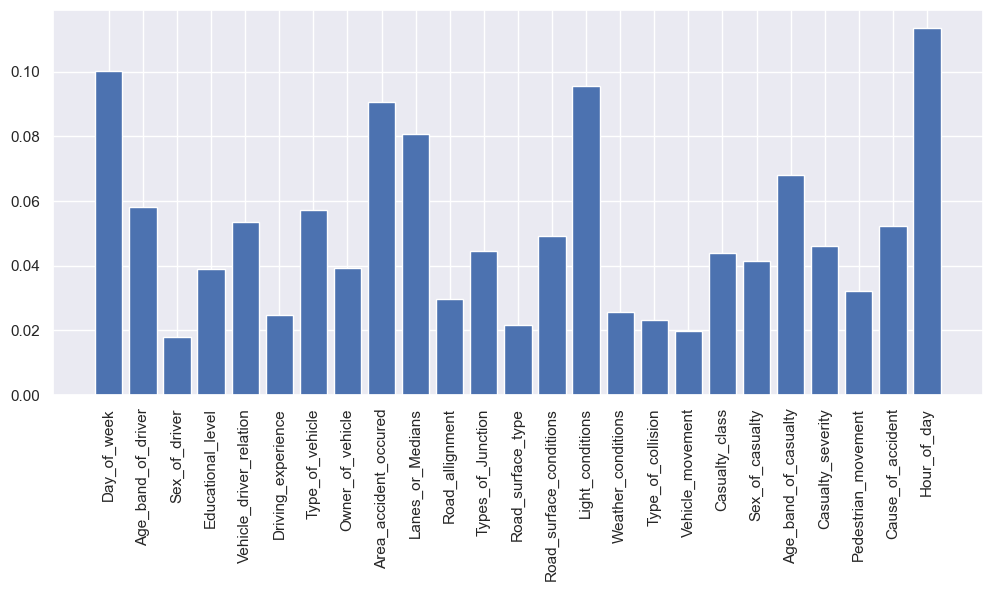

In [107]:
def fs_score_plot(fs_func):
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' % (fs_func.get_feature_names_out()[i], fs_func.scores_[i]))
    # plot the scores
    plt.figure(figsize=(12,5))
    plt.bar(fs_func.get_feature_names_out(), fs_func.scores_)
    plt.xticks(rotation=90)
    plt.show()

fs_score_plot(fs_corr)
fs_score_plot(fs_info)

In [108]:
def features_dist(column_name):
    return pd.concat([df_original[column_name].value_counts() / df_original.shape[0]*100,
        df_cln[column_name].value_counts() / df_cln.shape[0] * 100], axis=1,
        keys=[column_name + '_orginal', column_name + '_clean'])

## 04_Model Selection, Training and Evaluation

#### Creating Base Models

In [109]:
# Evaluate metrics
def get_accuracy_score(y_test , y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Base Model Accuracy: {accuracy:.2f}")
    print(f"Base Model Precision: {precision:.2f}")
    print(f"Base Model Recall: {recall:.2f}")
    print(f"Base Model F1-score: {f1:.2f}")

##### 1-Randomforest

In [110]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Base Model Accuracy: 0.87
Base Model Precision: 0.87
Base Model Recall: 0.87
Base Model F1-score: 0.87


##### 2-Logistic Regressor

In [111]:
lr_classifier = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
# Train the classifier
lr_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = lr_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Base Model Accuracy: 0.65
Base Model Precision: 0.64
Base Model Recall: 0.65
Base Model F1-score: 0.65


##### 3-Logistic RegressorCV

In [112]:
lrcv_classifier = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', scoring='accuracy', solver='lbfgs', max_iter=100, random_state=42)
# Train the classifier
lrcv_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = lrcv_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Base Model Accuracy: 0.65
Base Model Precision: 0.65
Base Model Recall: 0.65
Base Model F1-score: 0.65


##### 4-SGDClassifier

In [113]:
sgd_classifier = SGDClassifier(loss='hinge', alpha=0.01, max_iter=500, random_state=42)
# Train the classifier
sgd_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = sgd_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Base Model Accuracy: 0.65
Base Model Precision: 0.65
Base Model Recall: 0.65
Base Model F1-score: 0.65


##### 5-BaggingClassifier

In [114]:
bagging_classifier = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0,
                                       max_features=1.0, bootstrap=True, random_state=42)
# Train the classifier
bagging_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Base Model Accuracy: 0.92
Base Model Precision: 0.92
Base Model Recall: 0.92
Base Model F1-score: 0.92


##### 6-ExtraTreesClassifier

In [115]:
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2,
                                              min_samples_leaf=1, max_features='sqrt', random_state=42)
# Train the classifier
extra_trees_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = extra_trees_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Base Model Accuracy: 0.95
Base Model Precision: 0.95
Base Model Recall: 0.95
Base Model F1-score: 0.95


##### 7-KNeighborsClassifier

In [116]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
# Train the classifier
knn_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Base Model Accuracy: 0.85
Base Model Precision: 0.87
Base Model Recall: 0.85
Base Model F1-score: 0.84


##### 8-SVC

In [117]:
# svc_classifier = SVC(kernel='linear', C=1.0, random_state=42)
# # Train the classifier
# svc_classifier.fit(X_train_balanced, y_train_balanced)
# # Make predictions on the test set
# y_pred = svc_classifier.predict(X_test)

In [118]:
# get_accuracy_score(y_test, y_pred)

##### 9-NuSVC

In [119]:
# nu_svc_classifier = NuSVC(nu=0.5, kernel='rbf', gamma='scale', random_state=42)
# # Train the classifier
# nu_svc_classifier.fit(X_train_balanced, y_train_balanced)
# # Make predictions on the test set
# y_pred = nu_svc_classifier.predict(X_test)

In [120]:
# get_accuracy_score(y_test, y_pred)

##### 10-LinearSVC

In [121]:
# linear_svc_classifier = LinearSVC(max_iter=500, random_state=42)
# # Train the classifier
# linear_svc_classifier.fit(X_train_balanced, y_train_balanced)
# # Make predictions on the test set
# y_pred = linear_svc_classifier.predict(X_test)

In [122]:
# get_accuracy_score(y_test, y_pred)

##### 11-XGBClassifier

In [123]:
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
# Train the classifier
xgb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Base Model Accuracy: 0.82
Base Model Precision: 0.81
Base Model Recall: 0.82
Base Model F1-score: 0.81


##### 12-XGBRFClassifier

In [124]:
xgbrf_classifier = XGBRFClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
# Train the classifier
xgbrf_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = xgbrf_classifier.predict(X_test)
get_accuracy_score(y_test, y_pred)

Base Model Accuracy: 0.66
Base Model Precision: 0.65
Base Model Recall: 0.66
Base Model F1-score: 0.66


#### Traning Different Classifiers with Base Model and Best Features

In [125]:
# Create classifiers
classifiers = [
    # SVC(gamma='auto'),
    # NuSVC(gamma='auto'),
    # LinearSVC(),
    SGDClassifier(max_iter=50, tol=1e-3),
    KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'),
    LogisticRegressionCV(cv=3),
    BaggingClassifier(),
    ExtraTreesClassifier(n_estimators=100),
    RandomForestClassifier(n_estimators=100),
    XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42),
    XGBRFClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
]

In [130]:
def train_classifiers(classifiers, X_train, y_train):
    trained_classifiers = {}
    for clf in classifiers:
        clf.fit(X_train, y_train)
        trained_classifiers[clf.__class__.__name__] = clf
    return trained_classifiers

def get_scores(trained_classifiers, X_test, y_test):
    scores = {}
    for clf_name, clf in trained_classifiers.items():
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")
        scores[clf_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        }
        # Calculate feature importance (if available)
        if hasattr(clf, 'feature_importances_'):
            importances = clf.feature_importances_
            indices = np.argsort(importances)
            num_features = 25 # Customize the number of features to display
            plt.figure(figsize=(12, 8))
            plt.title(f'Feature Importances for {clf_name}')
            plt.barh(range(num_features), importances[indices[-num_features:]], color='g', align='center')
            plt.yticks(range(num_features), X_test.columns)
            plt.xlabel('Importance Score')
            plt.show()

    return scores

##### Base Models Accuracy Scores

In [128]:
trained_classifiers_base = train_classifiers(classifiers=classifiers , X_train = X_train , y_train = y_train)

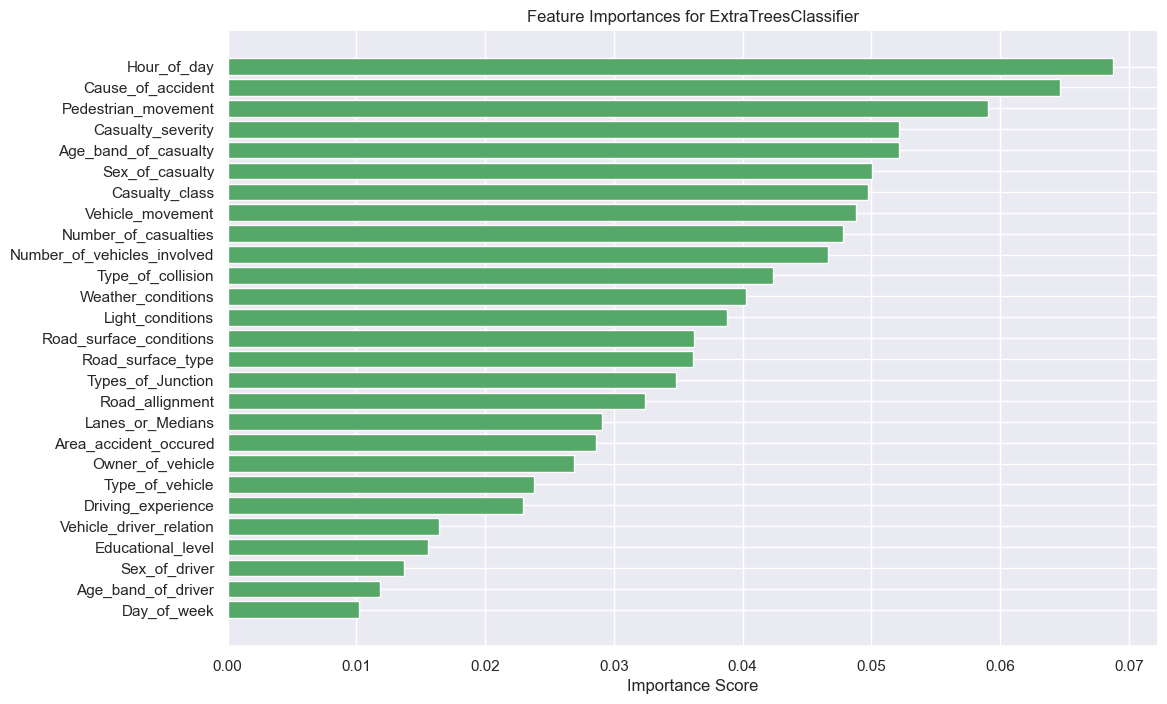

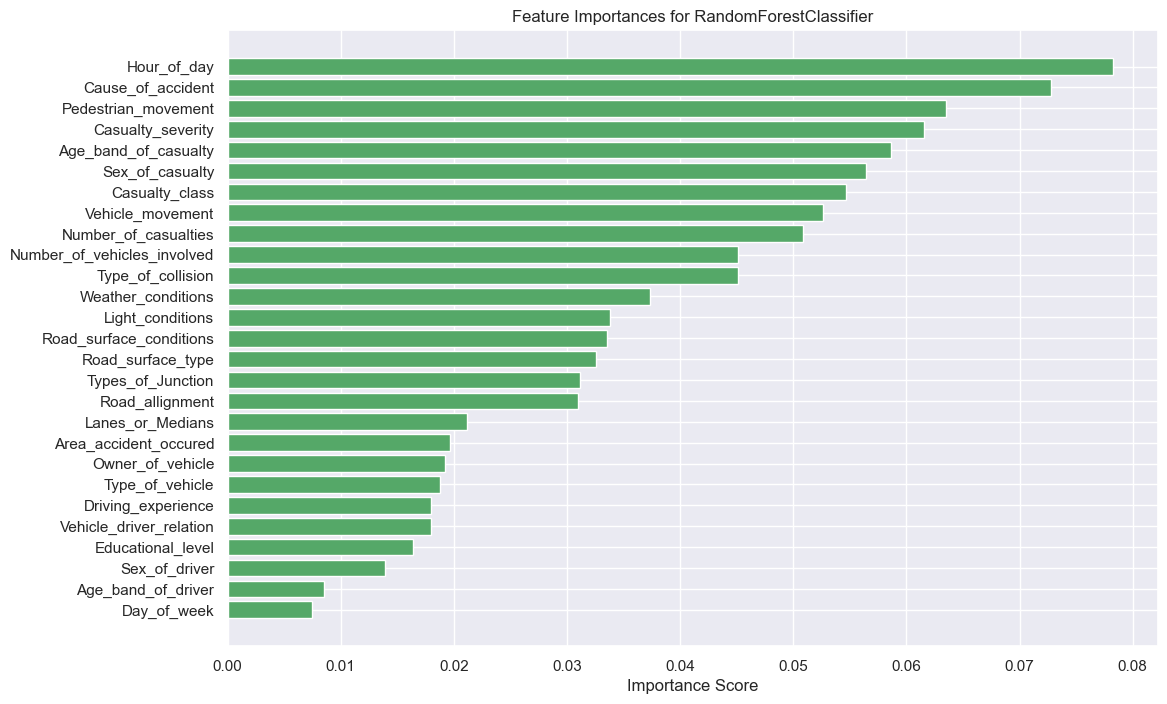

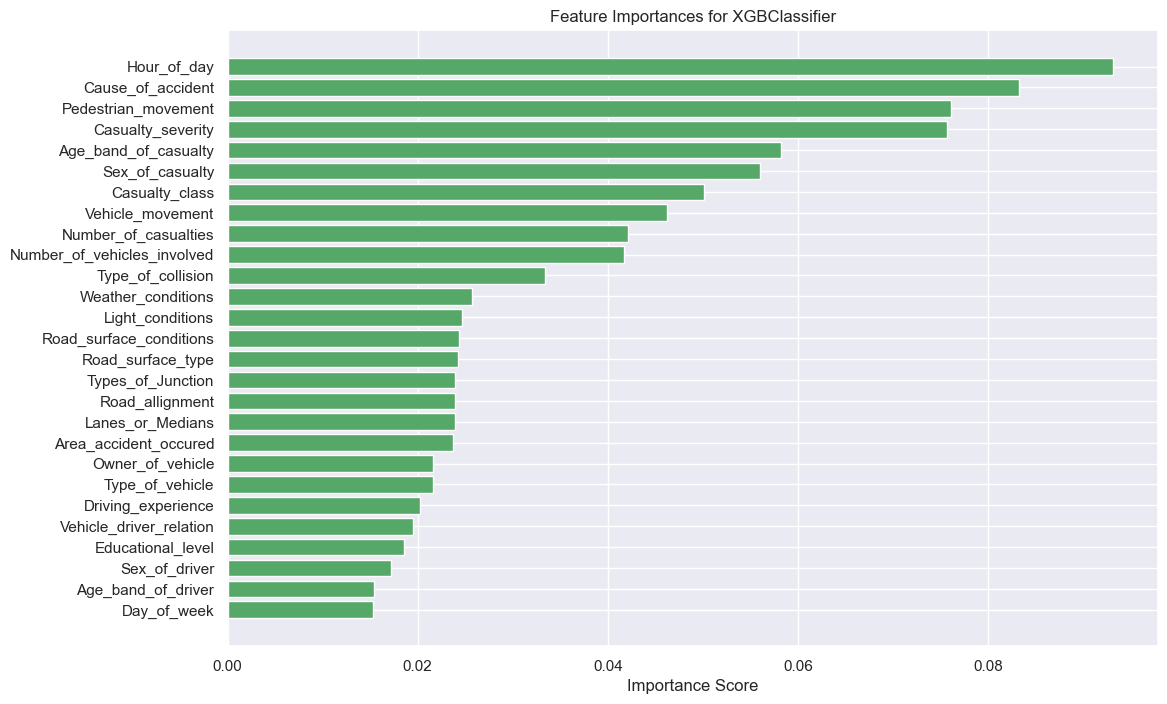

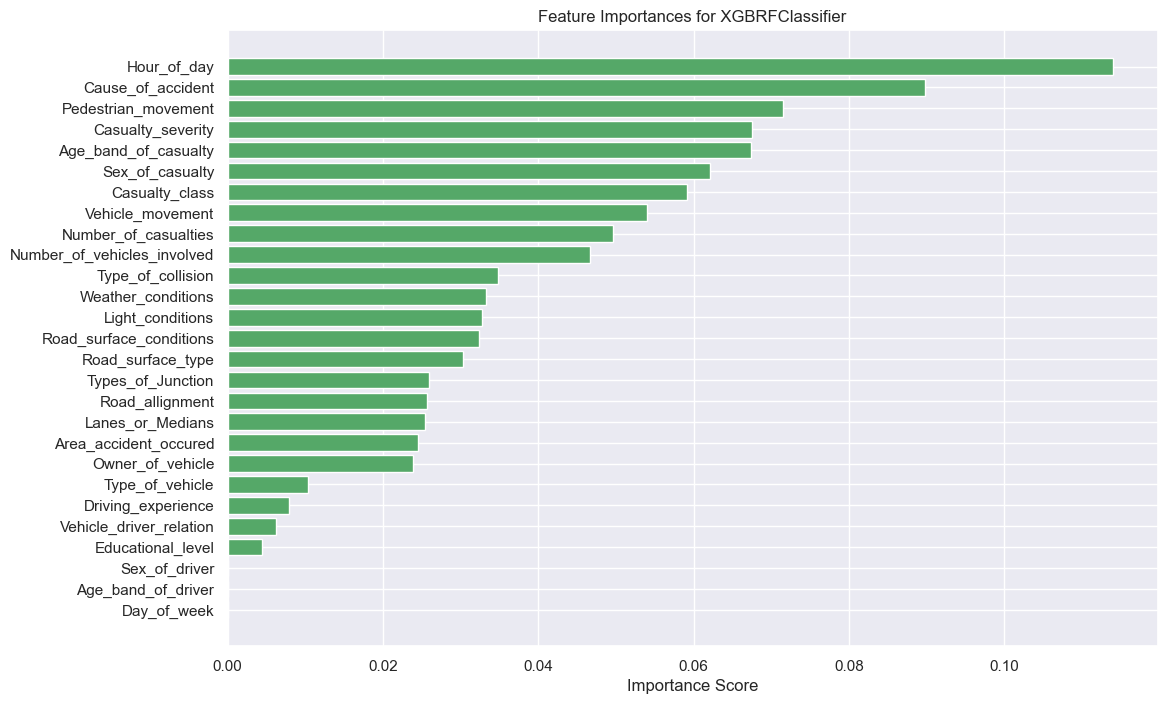

In [129]:
scores_base_models = get_scores(trained_classifiers_base, X_test, y_test)

##### Best Features Models Accuracy Scores

In [131]:
trained_classifiers_bf = train_classifiers(classifiers=classifiers , X_train = X_train_border , y_train = y_train_border)

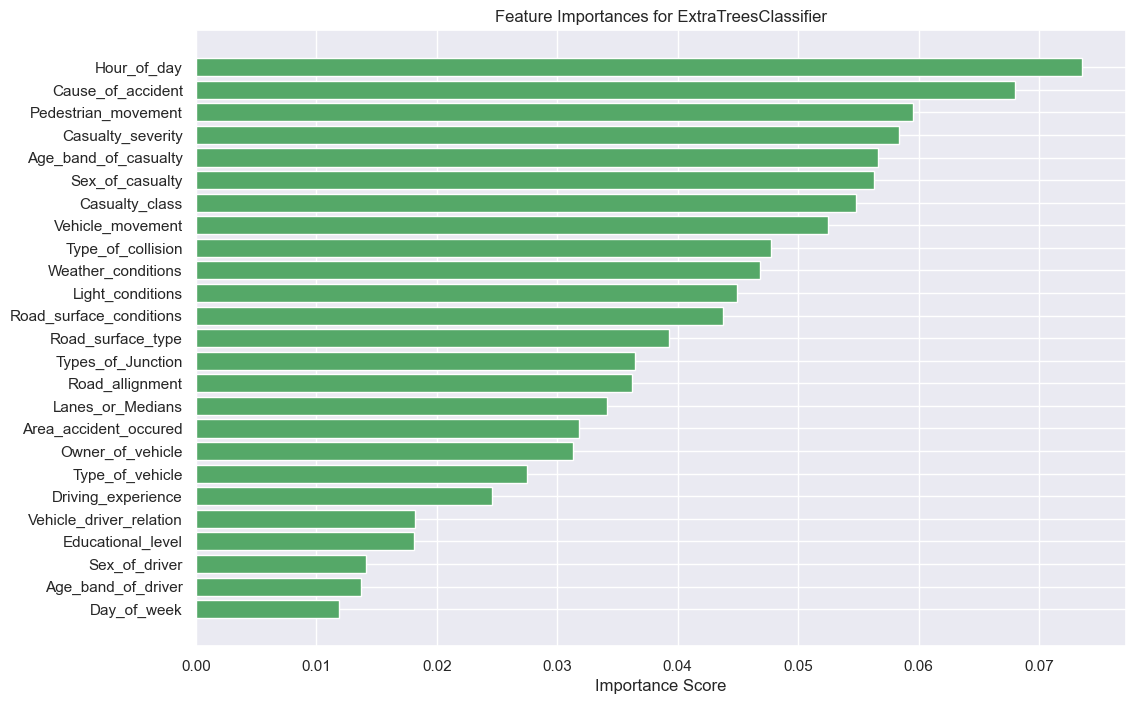

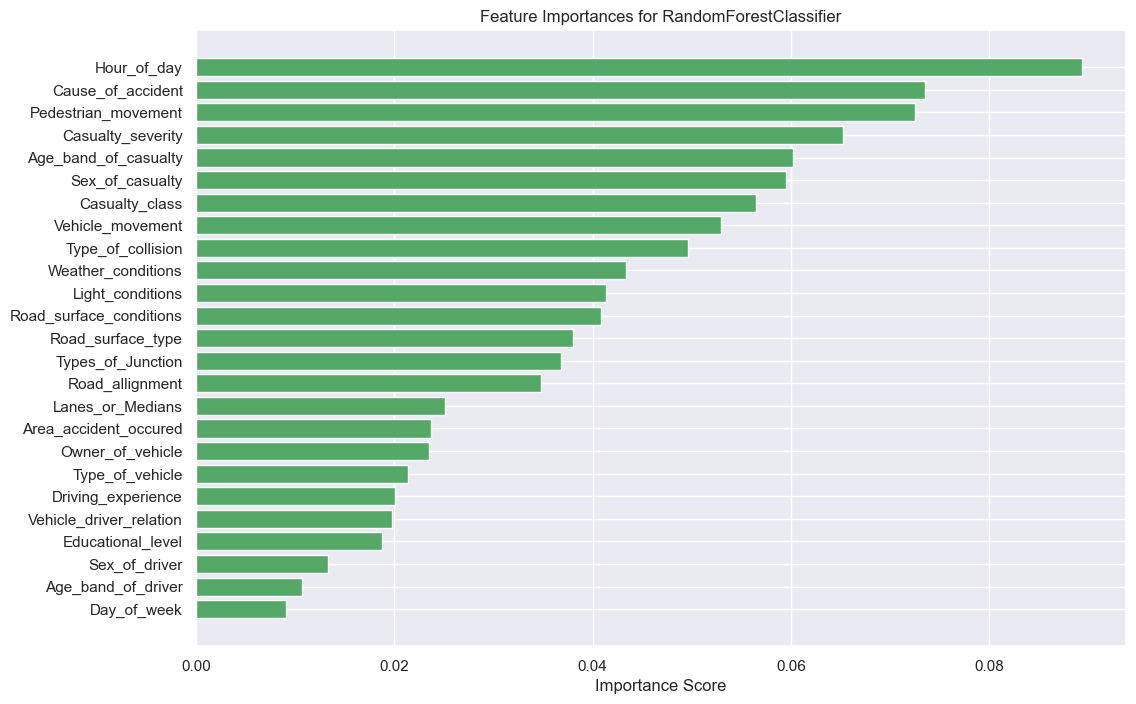

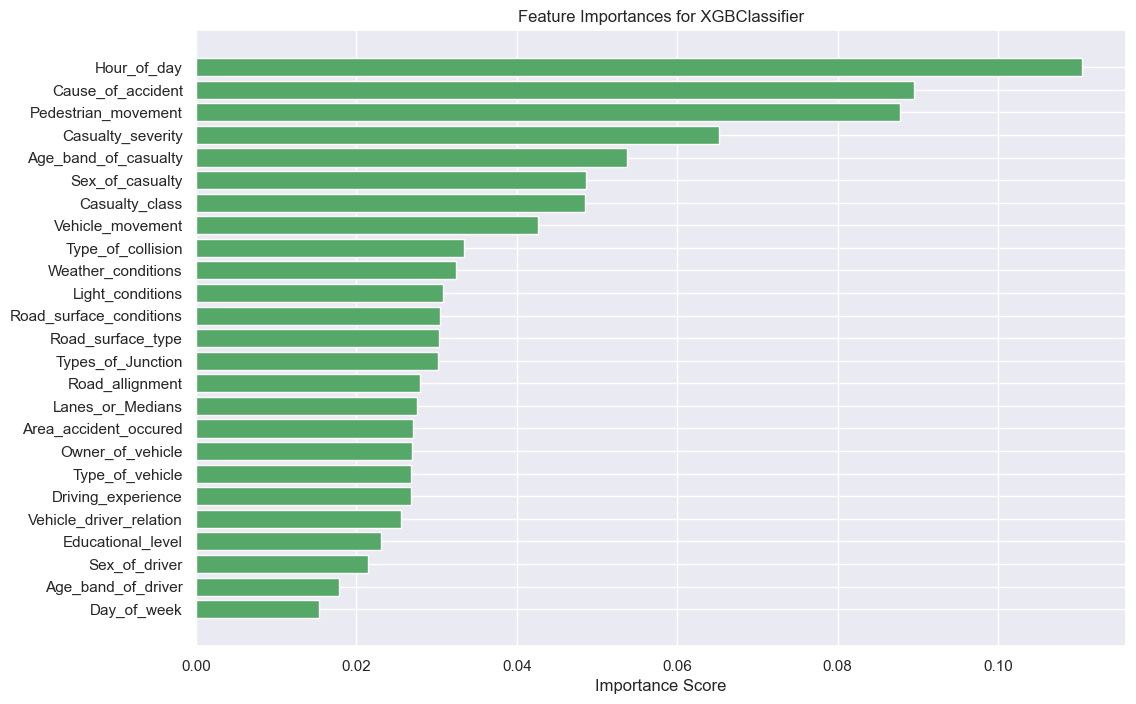

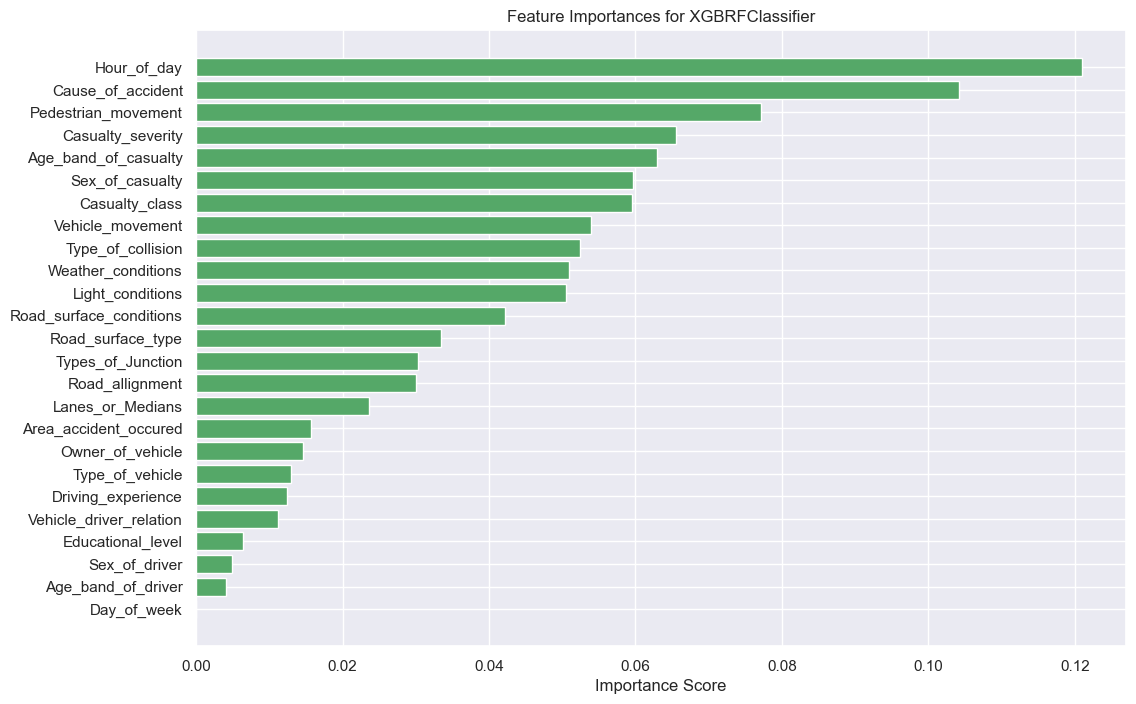

In [132]:
scores_bf = get_scores(trained_classifiers_bf, X_test_border, y_test_border)

In [133]:
def plot_feature_importance(model, train_features, num_features=10):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
    plt.yticks(range(num_features), train_features.columns)
    plt.xlabel('Importance Score')
    plt.show()

#### Evaluating Model

In [136]:
# Visualize results with Base Models 27 Features
df_scores_base_models = pd.DataFrame(scores_base_models)
df_scores_base_models

SGDClassifier  KNeighborsClassifier  LogisticRegression  \
Accuracy        0.603297              0.845255            0.642343   
Precision       0.639396              0.871231            0.636045   
Recall          0.603297              0.845255            0.642343   
F1-score        0.567946              0.836947            0.636929   

           LogisticRegressionCV  BaggingClassifier  ExtraTreesClassifier  \
Accuracy               0.650504           0.905745              0.951832   
Precision              0.644884           0.906660              0.953078   
Recall                 0.650504           0.905745              0.951832   
F1-score               0.645590           0.905865              0.951947   

           RandomForestClassifier  XGBClassifier  XGBRFClassifier  
Accuracy                 0.936790       0.815010         0.659466  
Precision                0.937643       0.813054         0.654125  
Recall                   0.936790       0.815010         0.659466  
F1-score                 0.936927       0.812022         0.655094

In [137]:
# Visualize results with Best 25 Features 
df_scores_bf = pd.DataFrame(scores_bf)
df_scores_bf

SGDClassifier  KNeighborsClassifier  LogisticRegression  \
Accuracy        0.476716              0.842055            0.570171   
Precision       0.575823              0.868826            0.560911   
Recall          0.476716              0.842055            0.570171   
F1-score        0.465139              0.833265            0.561059   

           LogisticRegressionCV  BaggingClassifier  ExtraTreesClassifier  \
Accuracy               0.579613           0.906385              0.945911   
Precision              0.569935           0.907171              0.947034   
Recall                 0.579613           0.906385              0.945911   
F1-score               0.570407           0.906395              0.946041   

           RandomForestClassifier  XGBClassifier  XGBRFClassifier  
Accuracy                 0.939190       0.792767         0.607617  
Precision                0.940176       0.790773         0.602603  
Recall                   0.939190       0.792767         0.607617  
F1-score                 0.939316       0.787436         0.592122

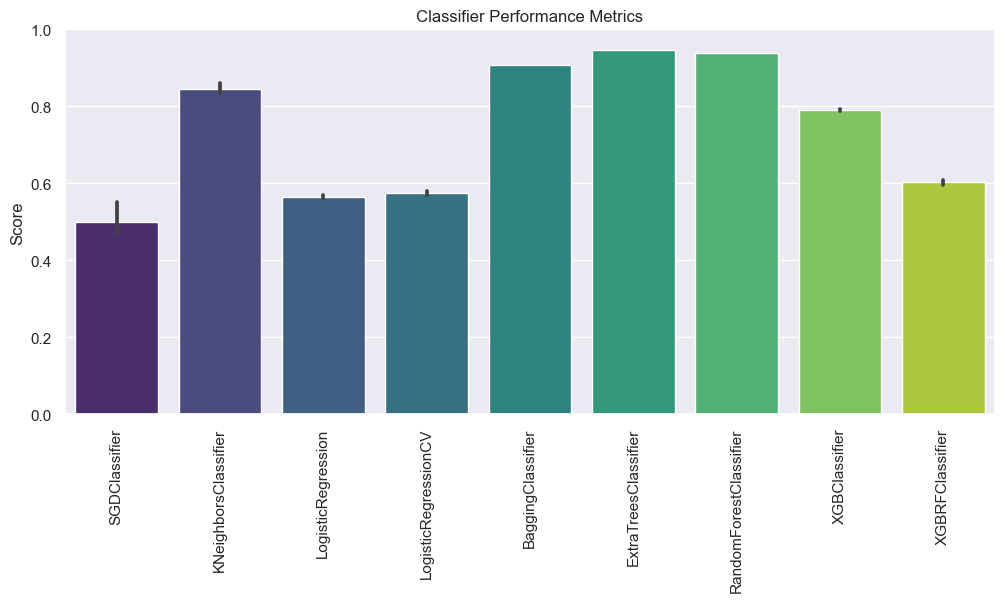

In [138]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df_scores_bf, palette='viridis')
plt.title('Classifier Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.show()

### Tuning the Model with GridSearchCV

In [ ]:
Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 80, 100, 200, 250, 300],  # Number of trees in the forest
    # "criterion": ["gini", "entropy"],
    "max_depth": [5, 10],
    'max_features': ['sqrt', 'log2'],  # Maximum features considered for each split or "max_features": [3, 5]
    'min_samples_split': [2, 4, 6,],  # Minimum samples required to split an internal node
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}
# Create the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
# Initialize K-Fold cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='f1_weighted',n_jobs=-1)

In [ ]:
# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

In [ ]:
# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Score:", best_score)
# display("Best Parameters:", best_params)

In [ ]:
# Now you can create a new Random Forest model using the best parameters
best_params = {'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 300}
best_rf_model = RandomForestRegressor(random_state=42 ,**best_params)
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

### Tuning the Model with Optuna

## 05_Evaluating Tuned Models

## 06_Communicating the Result/Report

In [ ]:
feature_importances = best_rf_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

In [ ]:
def feature_importance_plot(df, model=best_rf_model, top_n = 10):
    # Create a DataFrame with feature names and importances
    feature_importance_df = pd.DataFrame({'Feature': df.columns, 'Importance':model.feature_importances_})
    feature_importance_df.sort_values(by="Importance" , ascending=True, inplace=True)

    # top_n = 10
    # Create a horizontal bar chart
    trace = go.Bar(
        x=feature_importance_df['Importance'][:top_n],
        y=feature_importance_df['Feature'][:top_n],
        orientation='h',
        text=feature_importance_df['Importance'][:top_n].apply(lambda x: f'{x:.2f}'),  # Format values
        textposition='outside'  # Position value labels outside the bars
    )
    layout = go.Layout(
        title=f'Top {top_n} Feature Importances',
        xaxis=dict(title='Importance'),
        yaxis=dict(title='Feature')
    )
    fig = go.Figure(data=[trace], layout=layout)
    fig.show()
feature_importance_plot(X)

In [ ]:
# Calculate permutation importance
perm_importance = permutation_importance(best_rf_model, X_test, y_test, n_repeats=10, random_state=42)
# Plot feature importances
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance via Permutation Importance")
plt.show()

**Optuna** is a powerful Python library for hyperparameter optimization. It automates the process of selecting optimal hyperparameters through various optimization algorithms, including **Tree-structured Parzen Estimator (TPE)**. Optuna is also framework-agnostic, meaning you can use it with any machine learning or deep learning framework.

Here's how you can use Optuna for hyperparameter optimization:

1. **Define Your Objective Function**:
   - The objective function represents the metric you want to optimize (e.g., accuracy, F1-score, etc.).
   - Optuna will search for hyperparameters that minimize or maximize this objective function.

2. **Create a Study Object**:
   - A study object manages the optimization process.
   - Set the direction of optimization (maximize or minimize).

3. **Run Trials**:
   - Use `study.optimize(objective, n_trials=100)` to run a specified number of trials.
   - Optuna will suggest hyperparameters and evaluate their performance.

4. **Advanced Features**:
   - Optuna supports advanced features like pruning strategies, feature selection, and experiment tracking.
   - You can visualize optimization results with built-in plots and save sessions for resuming or sharing across multiple processes.

Remember that hyperparameter tuning is an art, and finding the best hyperparameters depends on your specific data and problem. Optuna simplifies this process and helps you fine-tune your machine learning models effectively! 🚀

If you'd like more detailed examples or specific use cases, feel free to ask! 😊

Source: Conversation with Bing, 23/02/2024
(1) Python Optuna: A Guide to Hyperparameter Optimization • datagy. https://datagy.io/python-optuna/.
(2) Optuna: Simple Guide to Hyperparameters Tuning / Optimization. https://bing.com/search?q=how+to+optimize+hyperparameters+using+optuna.
(3) Using Optuna to Optimize XGBoost Hyperparameters - Medium. https://medium.com/optuna/using-optuna-to-optimize-xgboost-hyperparameters-63bfcdfd3407.
(4) Optuna - A hyperparameter optimization framework. https://optuna.org/.
(5) How to tune a CatBoostClassifier model with Optuna - Practical Data Science. https://practicaldatascience.co.uk/machine-learning/how-to-tune-a-catboostclassifier-model-with-optuna.